In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, plotly.express as px, json
from urllib.request import urlopen

sns.set_style("darkgrid")
plt.style.use('ggplot')

In [2]:
sales = pd.read_excel(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\supermarkt_sales.xlsx", engine='openpyxl', usecols='B:R', skiprows=3)

sales.head()

Invoice ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2021-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2021-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2021-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2021-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2021-02-08   

       Time      Payment    cogs  gross margin percentage  gross income  \
0  13:08:00      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00         Cash   76.40                 4.761905        3.8200   
2  13:23:00  Credit card  324.31                 4.761905       16.2155   
3  20:33:00      Ewallet  465.76                 4.761905       23.2880   
4  10:37:00      Ewallet  604.17                 4.761905       30.2085   

   Rating  
0     9.1  
1     9.6  
2     7.4  
3     8.4  
4     5.3

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [4]:
sales['Time'] = pd.to_datetime(sales['Time'], format='%H:%M:%S').dt.hour

sales.head()

Invoice ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2021-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2021-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2021-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2021-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2021-02-08   

   Time      Payment    cogs  gross margin percentage  gross income  Rating  
0    13      Ewallet  522.83                 4.761905       26.1415     9.1  
1    10         Cash   76.40                 4.761905        3.8200     9.6  
2    13  Credit card  324.31                 4.761905       16.2155     7.4  
3    20      Ewallet  465.76                 4.761905       23.2880     8.4  
4    10      Ewallet  604.17                 4.761905       30.2085     5.3

# **`Nulls`**

In [5]:
print("Null percentage per Column.")

for i in sales.columns:
    print(f"{i} : {sales[sales[i].isnull()].shape[0] / sales.shape[0] * 100}%")

Null percentage per Column.
Invoice ID : 0.0%
Branch : 0.0%
City : 0.0%
Customer_type : 0.0%
Gender : 0.0%
Product line : 0.0%
Unit price : 0.0%
Quantity : 0.0%
Tax 5% : 0.0%
Total : 0.0%
Date : 0.0%
Time : 0.0%
Payment : 0.0%
cogs : 0.0%
gross margin percentage : 0.0%
gross income : 0.0%
Rating : 0.0%


Observations:
- The whole dataframe is complete.

# **`Duplicates`**

In [6]:
sales[sales.duplicated(subset="Invoice ID")]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer_type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

Observations:
- Any of the rows is duplicated.

# **`Univariable Analysis`**

### **`Total Sales`**

In [7]:
print(f"USD ${sales['Total'].sum():,.2f}")

USD $322,966.75


### **`Average Sales per Transaction`**

In [8]:
print(f"USD ${sales['Total'].mean():,.2f}")

USD $322.97


### **`Transactions by Branches`**

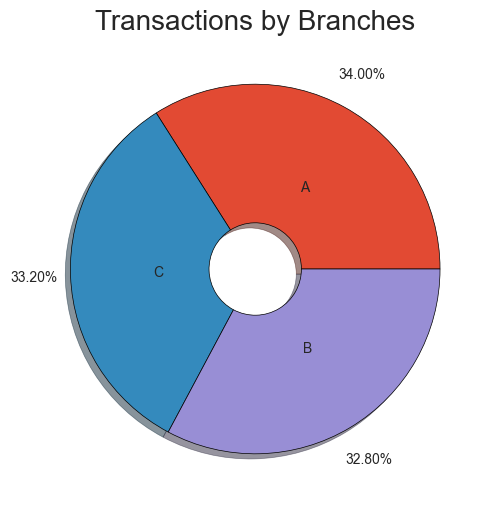

In [9]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Branch'].value_counts(),
    autopct='%.2f%%',
    pctdistance=1.2,
    labels=sales['Branch'].unique(),
    labeldistance=0.5,
    wedgeprops=dict(width=0.75, edgecolor='black'),
    shadow=True,
)

plt.title("Transactions by Branches", fontsize=20)
plt.show()

### **`Sales by City`**

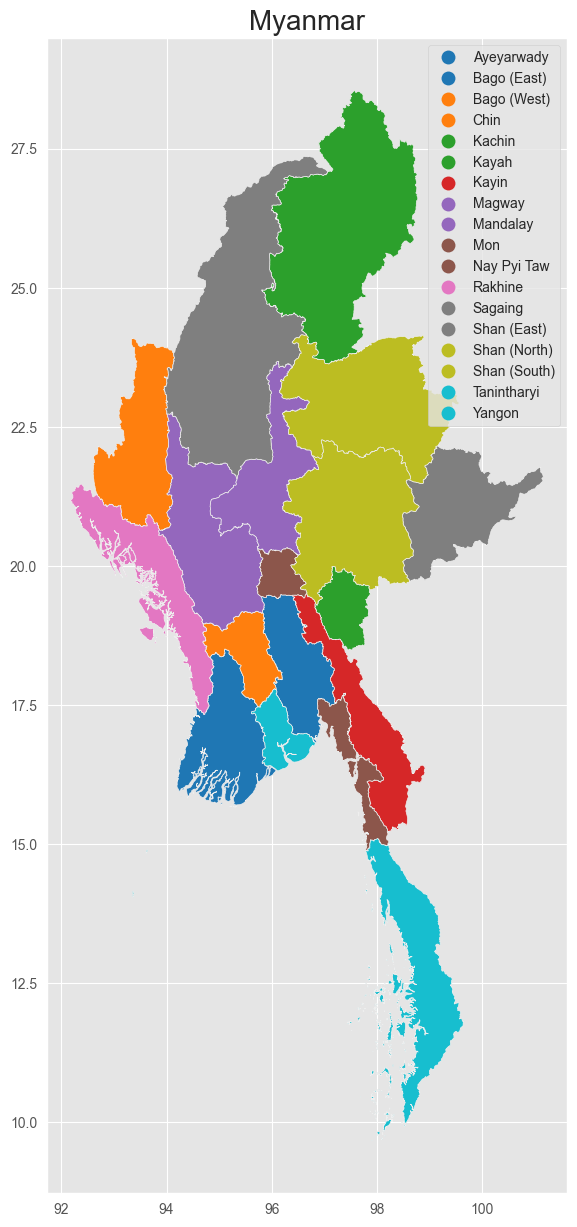

In [10]:
myanmar = gpd.read_file(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\state_region.geojson")

myanmar.plot('ST', legend=True, figsize=(15,15))

plt.title("Myanmar", fontsize=20)
plt.show()

### **`Sales by Customer Type`**

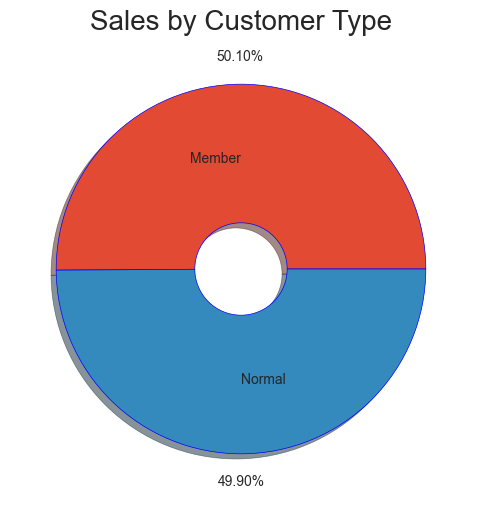

In [11]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Customer_type'].value_counts(),
    labels=sales['Customer_type'].unique(),
    labeldistance=0.6,
    autopct="%.2f%%",
    pctdistance=1.15,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Sales by Customer Type", fontsize=20)
plt.show()

### **`Transactions by Gender`**

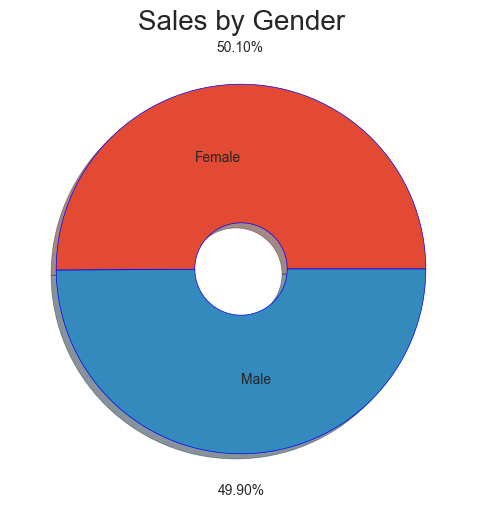

In [12]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Gender'].value_counts(),
    labels=sales["Gender"].unique(),
    autopct="%.2f%%",
    pctdistance=1.2,
    shadow=True,
    labeldistance=0.6,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Sales by Gender", fontsize=20)
plt.show()

### **`Transactions by Product Line`**

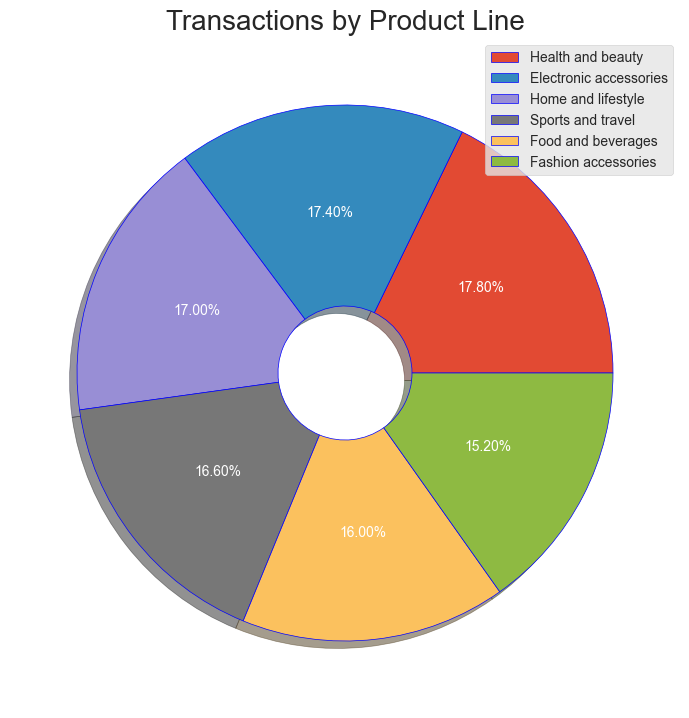

In [13]:
plt.figure(figsize=(10,7))

plt.pie(
    x=sales['Product line'].value_counts(),
    autopct="%.2f%%",
    pctdistance=0.6,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='b'),
    textprops=dict(color='w',)
)

plt.legend(sales['Product line'].unique())
plt.tight_layout()
plt.title("Transactions by Product Line", fontsize=20)
plt.show()

### **`Distribution of the Sales by Unit Price`**

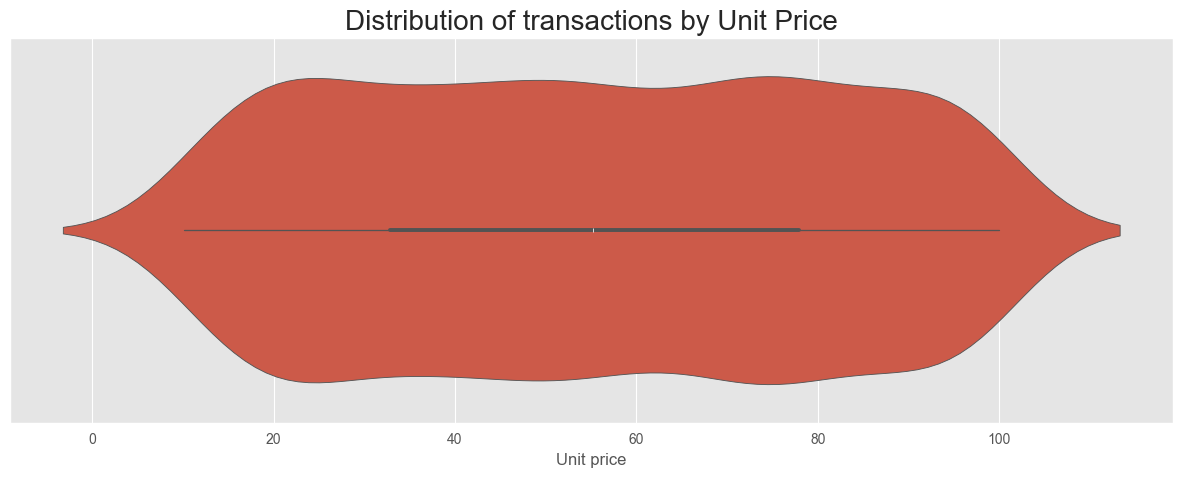

In [14]:
plt.figure(figsize=(15,5))

sns.violinplot(
    x=sales['Unit price']
)

plt.title("Distribution of transactions by Unit Price", fontsize=20)
plt.show()

### **`Distribution of the Sales by Quantity`**

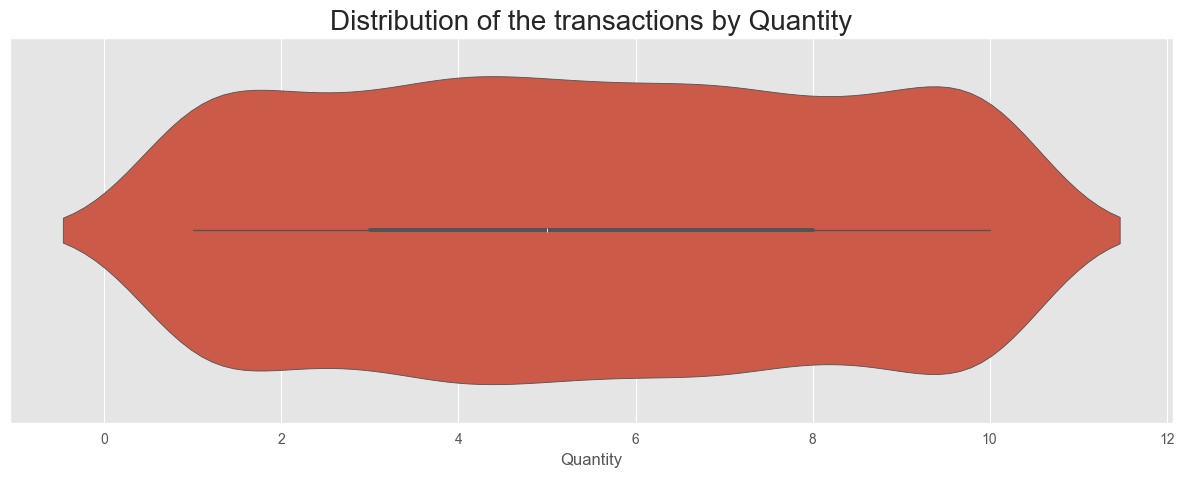

In [15]:
plt.figure(figsize=(15,5))

sns.violinplot(
    x=sales['Quantity']
)

plt.title("Distribution of the transactions by Quantity", fontsize=20)
plt.show()

### **`Total Sales by Date`**

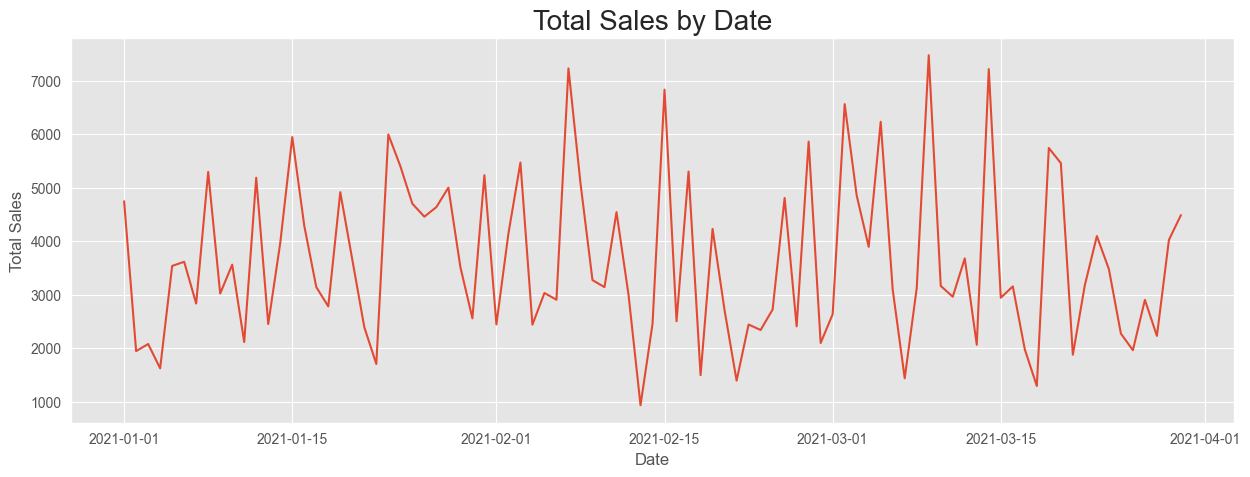

In [16]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=sales.groupby(by='Date')['Total'].sum()
)

plt.title("Total Sales by Date", fontsize=20)
plt.ylabel("Total Sales")
plt.show()

### **`Total Sales by Hour`**

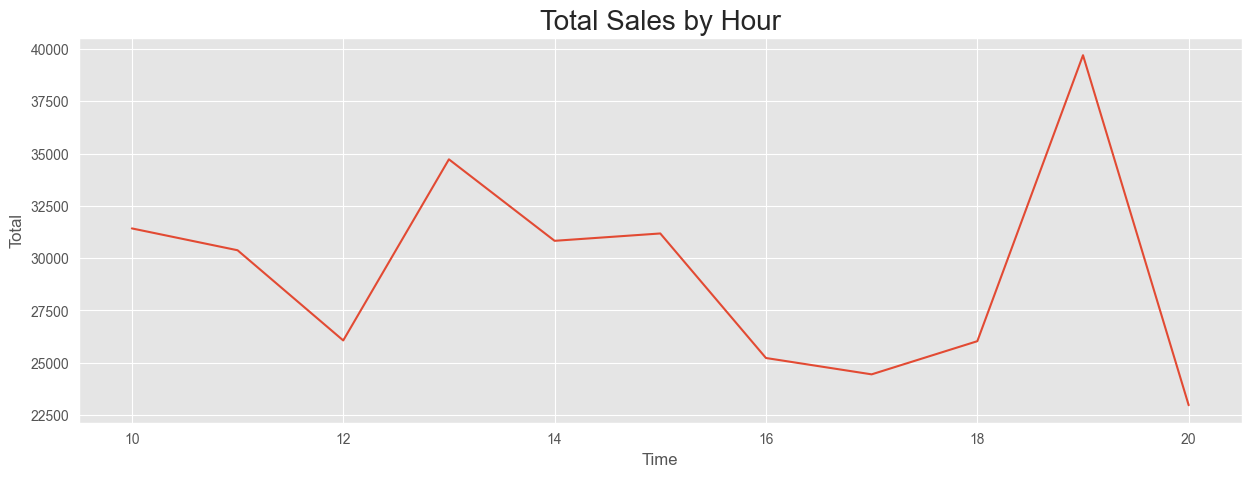

In [17]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=sales.groupby(by='Time')['Total'].sum()
)

plt.title("Total Sales by Hour", fontsize=20)
plt.ylabel("Total")
plt.show()

### **`Transactions by Payment`**

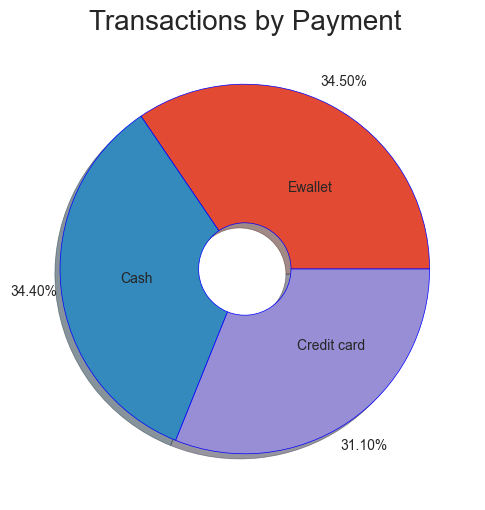

In [18]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Payment'].value_counts(),
    labels=sales['Payment'].unique(),
    autopct="%.2f%%",
    pctdistance=1.15,
    shadow=True,
    labeldistance=0.5,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Transactions by Payment", fontsize=20)
plt.show()

### **`Total Cost of Good Solds (cogs)`**

In [19]:
print(f"USD ${sales['cogs'].sum():,.2f}")

USD $307,587.38


### **`Average Gross Margin Percentage ((Net Sales - Cost of Good Sold) / Net Sales * 100)`**

In [20]:
print(f"%{sales['gross margin percentage'].mean():,.2f}")

%4.76


### **`Total Gross Income`**

In [21]:
print(f"USD ${sales['gross income'].sum():,.2f}")

USD $15,379.37


# **`Multivariable Analysis`**

In [22]:
sales[(sales['City'] == i)]['Branch'].value_counts().to_dict().keys()

dict_keys([])

### **`Correlation Chart`**

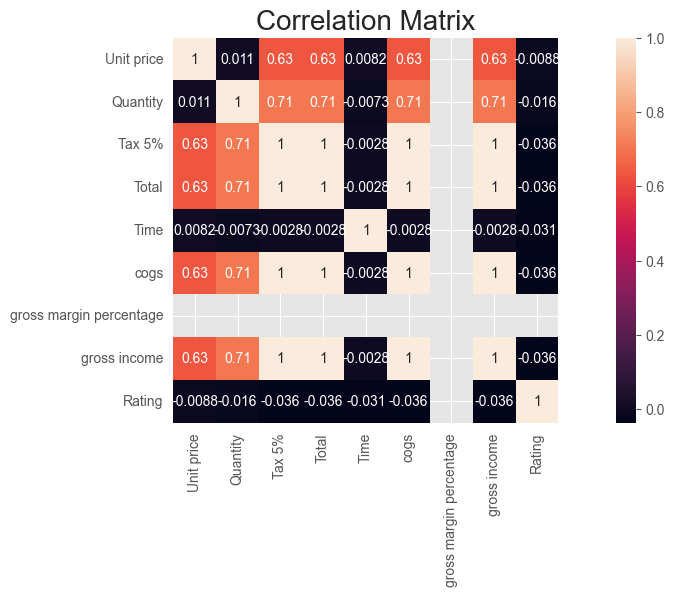

In [23]:
plt.figure(figsize=(15, 5))

sns.heatmap(
    data=sales.corr(numeric_only=True),
    cbar=True,
    square=True,
    annot=True,
)

plt.title("Correlation Matrix", fontsize=20)
plt.show()

### **`Branch`**

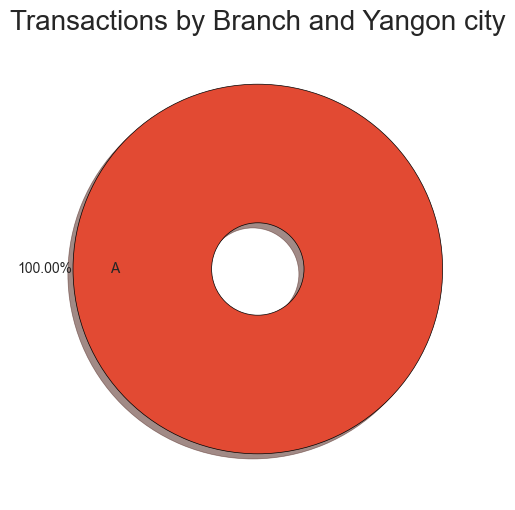

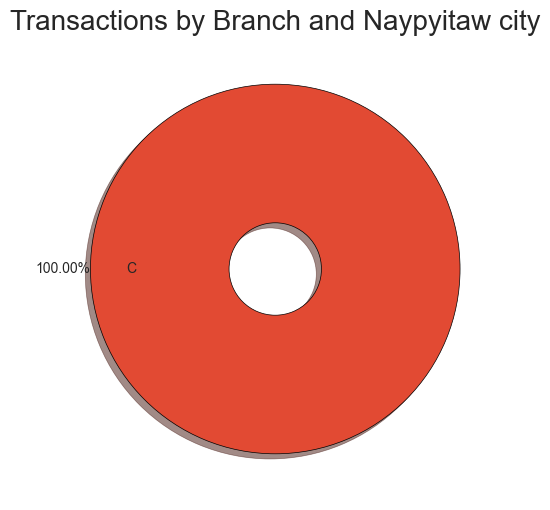

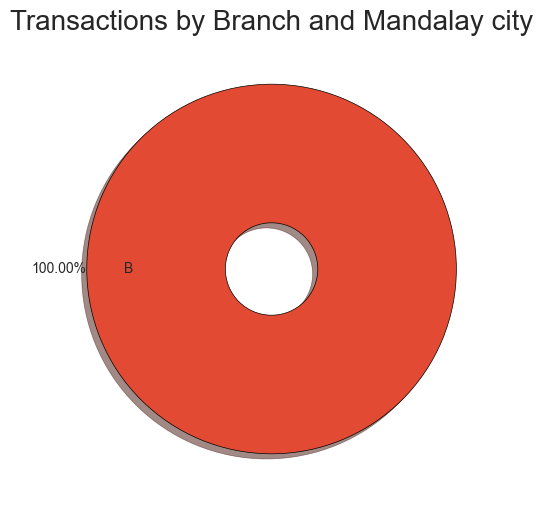

In [24]:
for i in sales['City'].unique():
    transactionsByBranchCity = sales[(sales['City'] == i)]['Branch'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(
        x=transactionsByBranchCity,
        labels=transactionsByBranchCity.keys(),
        autopct="%.2f%%",
        pctdistance=1.15,
        shadow=True,
        labeldistance=0.75,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i} city", fontsize=20)
    plt.show()

Options:
- Each of the brands are only located at the respective city

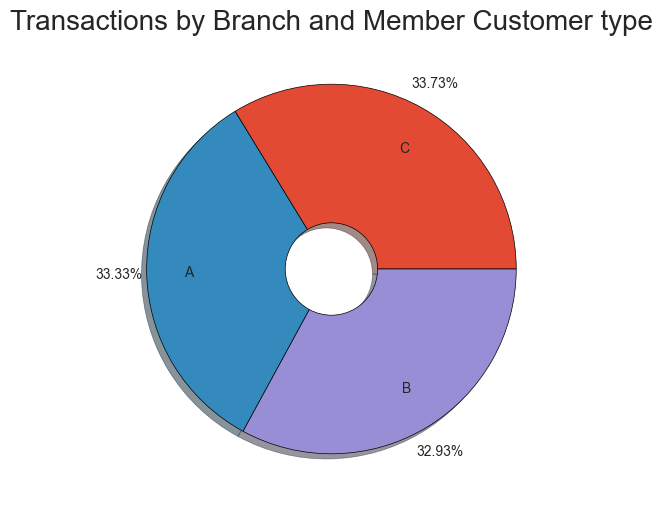

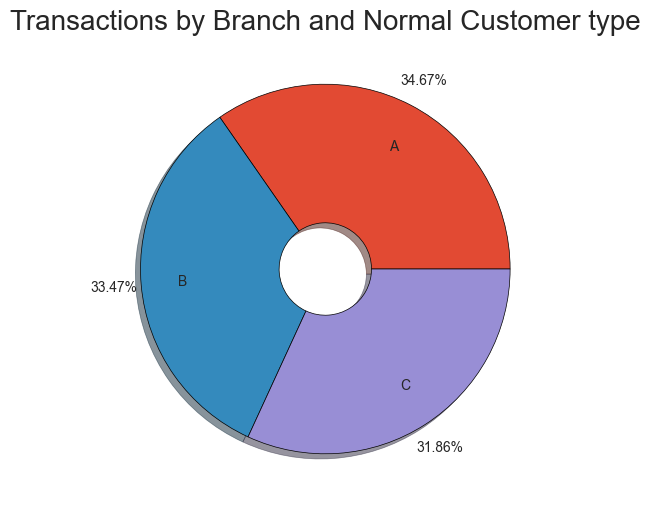

In [25]:
for i in sales['Customer_type'].unique():
    transactionsByBranchCustomerType = sales[(sales['Customer_type'] == i)]['Branch'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(
        x=transactionsByBranchCustomerType,
        labels=transactionsByBranchCustomerType.keys(),
        autopct="%.2f%%",
        pctdistance=1.15,
        shadow=True,
        labeldistance=0.75,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i} Customer type", fontsize=20)
    plt.show()

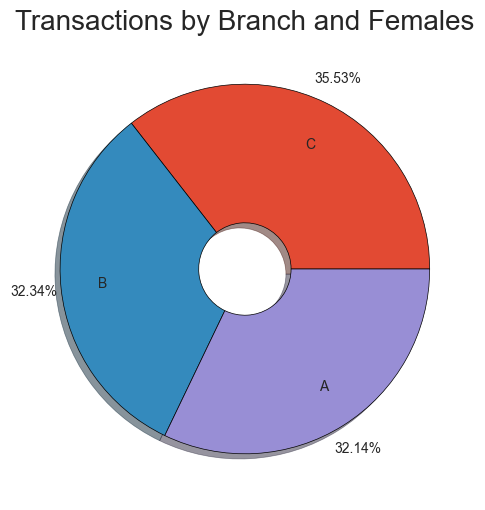

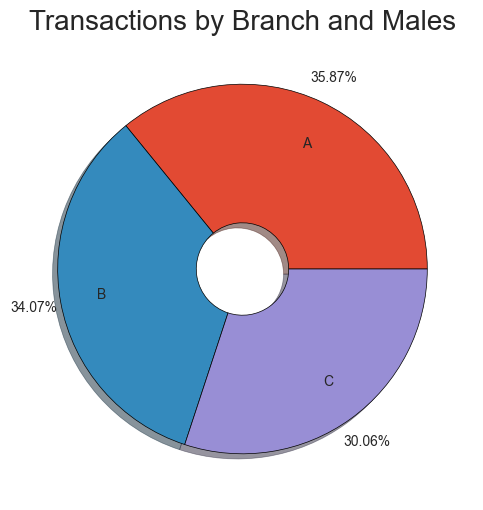

In [26]:
for i in sales['Gender'].unique():
    transactionsByBranchCustomerGender = sales[(sales['Gender'] == i)]['Branch'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(
        x=transactionsByBranchCustomerGender,
        labels=transactionsByBranchCustomerGender.keys(),
        autopct="%.2f%%",
        pctdistance=1.15,
        shadow=True,
        labeldistance=0.75,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i}s", fontsize=20)
    plt.show()

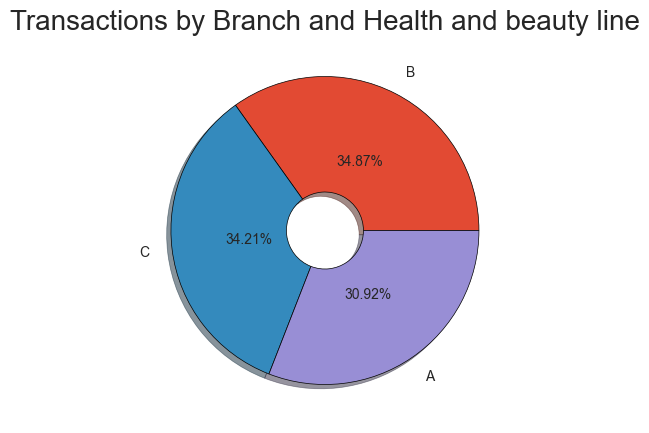

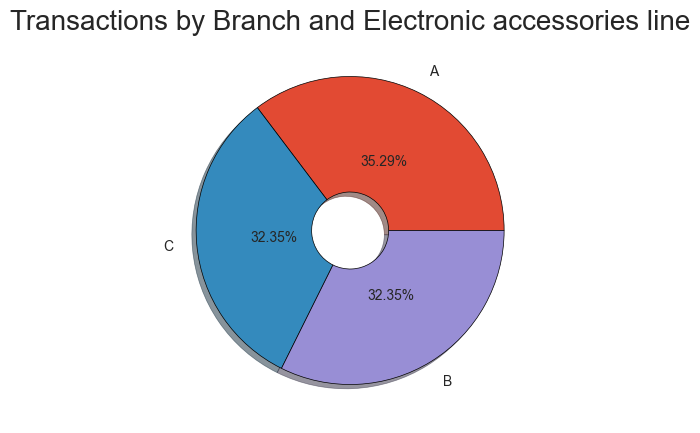

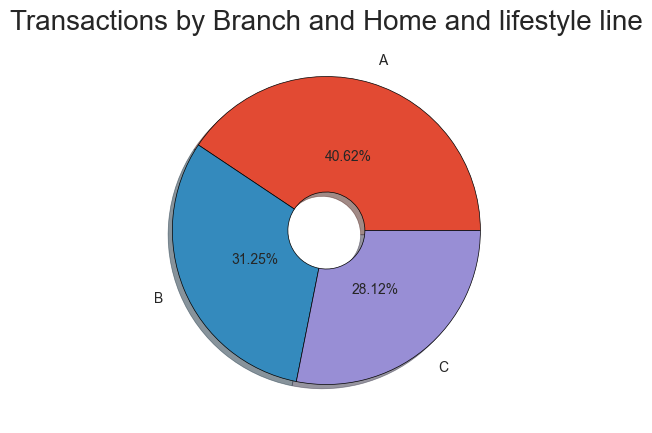

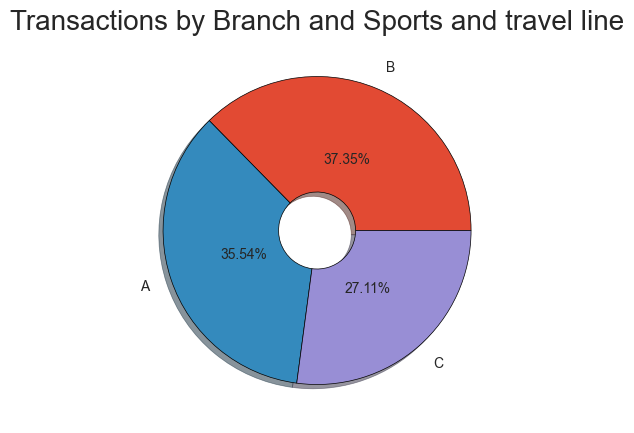

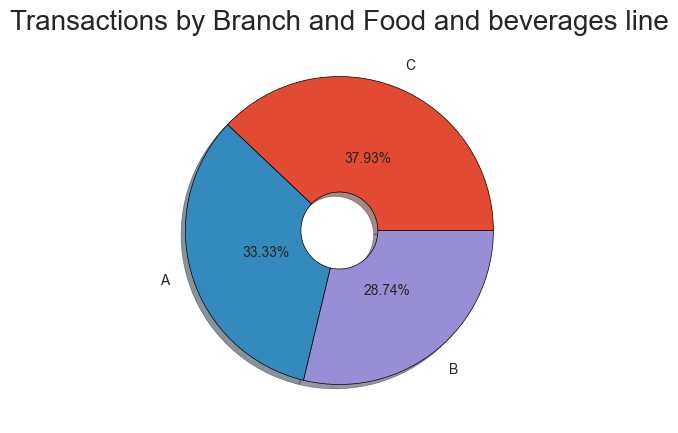

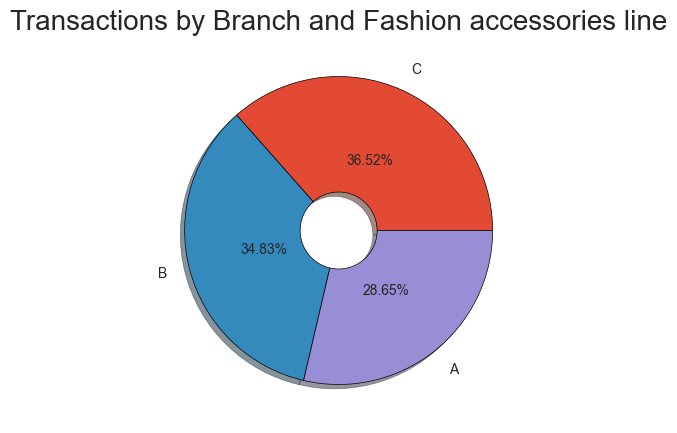

In [27]:
for i in sales['Product line'].unique():
    salesByCityProductLine = sales[sales['Product line'] == i]['Branch'].value_counts()
    plt.figure(figsize=(15,5))
    plt.pie(
        x=salesByCityProductLine,
        labels=salesByCityProductLine.keys(),
        labeldistance=1.15,
        autopct='%.2f%%',
        pctdistance=0.5,
        shadow=True,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i} line", fontsize=20)
    plt.show()

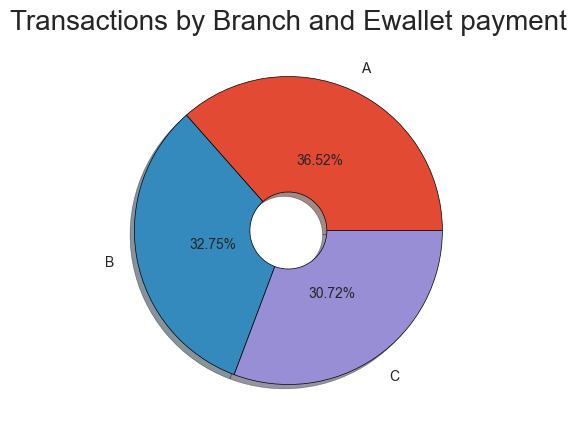

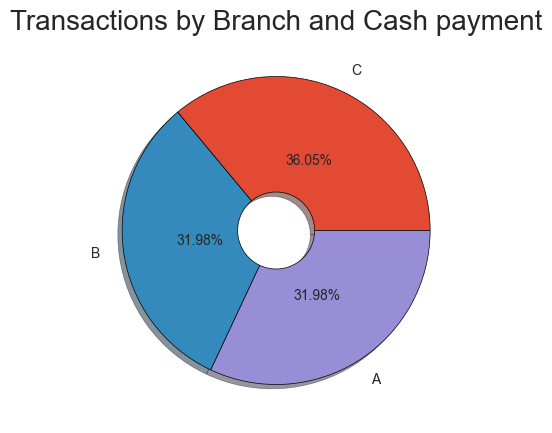

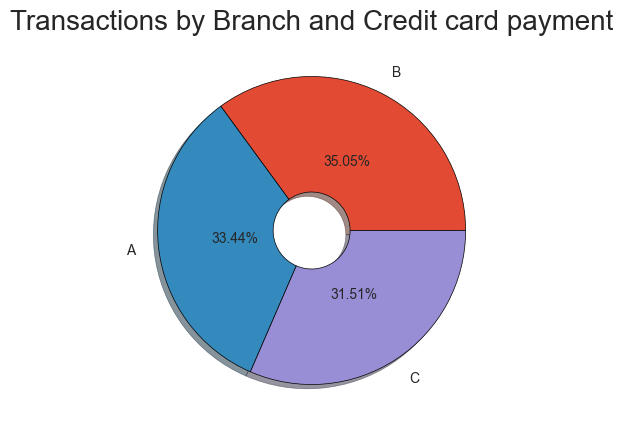

In [28]:
for i in sales['Payment'].unique():
    salesByBranchPayment = sales[sales['Payment'] == i]['Branch'].value_counts()
    plt.figure(figsize=(15,5))
    plt.pie(
        x=salesByBranchPayment,
        labels=salesByBranchPayment.keys(),
        labeldistance=1.15,
        autopct="%.2f%%",
        pctdistance=0.5,
        shadow=True,
        wedgeprops=dict(width=0.75, edgecolor='black')
    )
    plt.title(f"Transactions by Branch and {i} payment", fontsize=20)
    plt.show()

### **`City`**

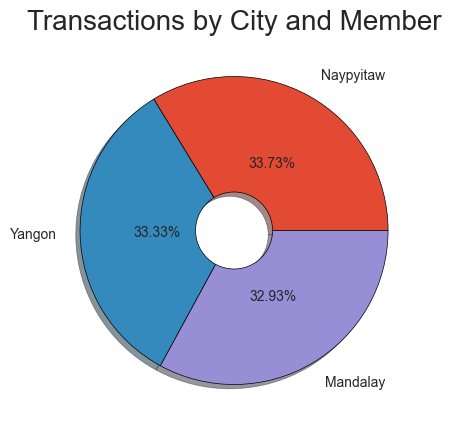

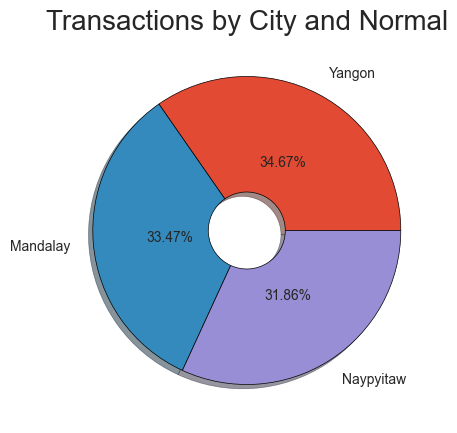

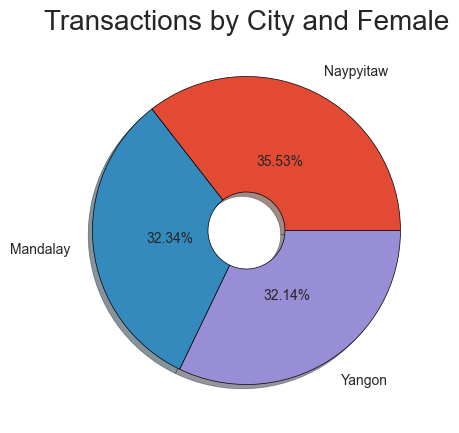

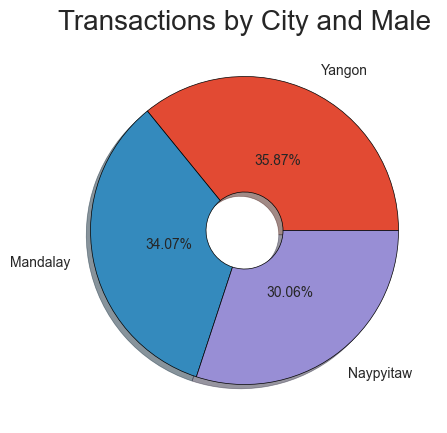

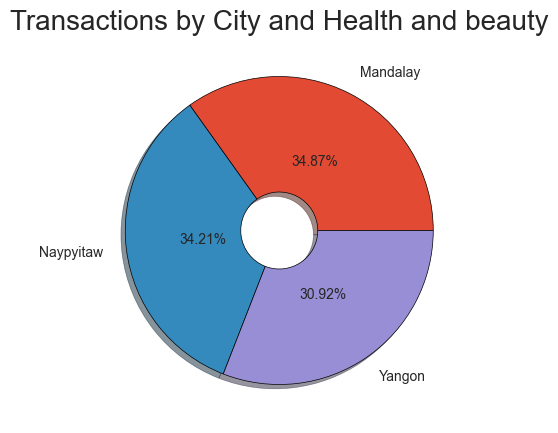

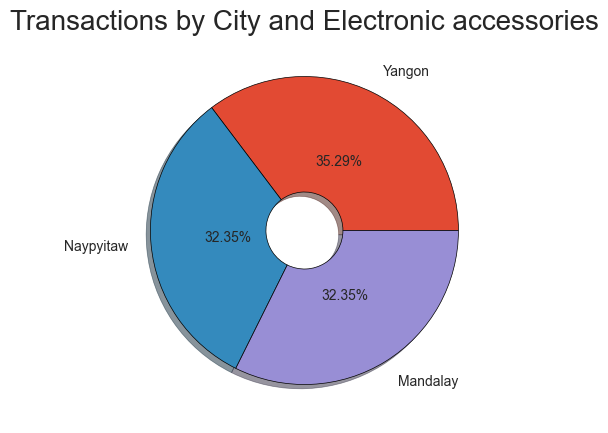

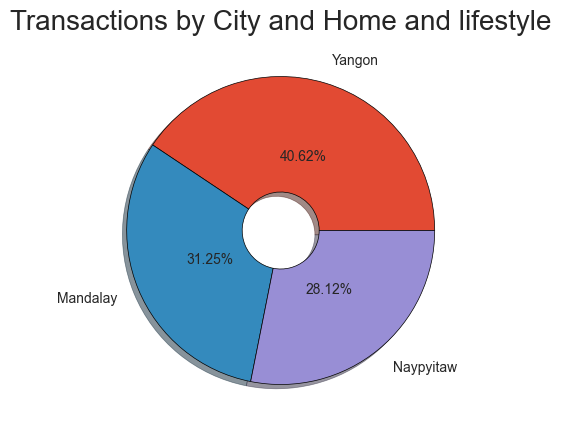

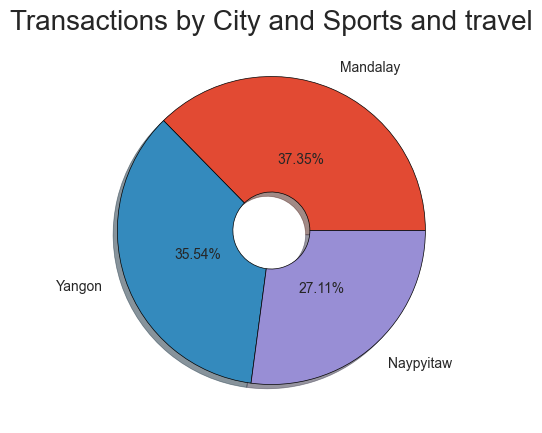

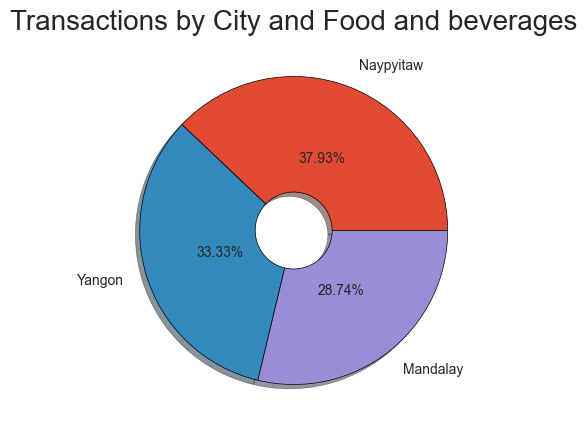

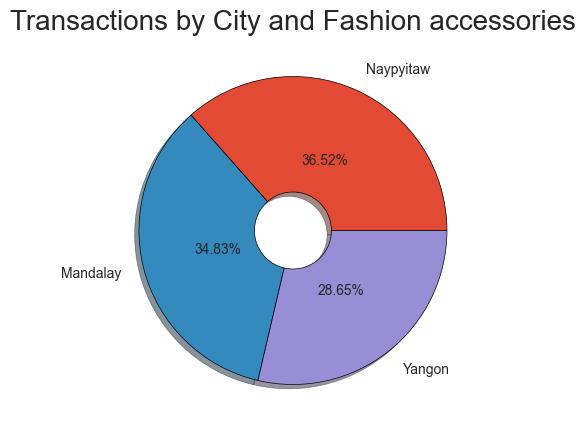

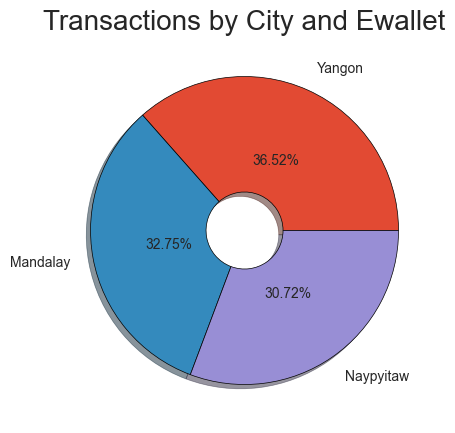

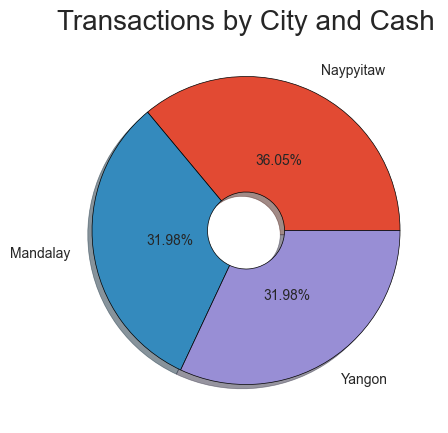

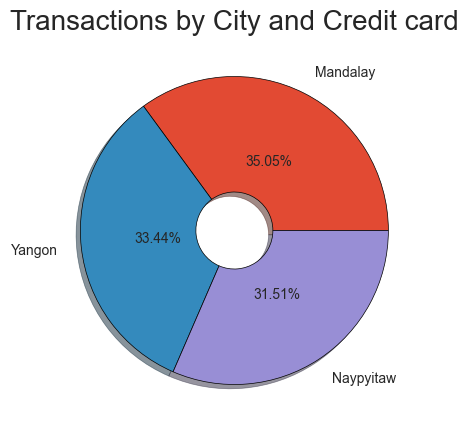

In [29]:
for i in ["Customer_type", 'Gender', 'Product line','Payment']:
    for j in sales[i].unique():
        salesByBranch_ = sales[sales[i] == j]['City'].value_counts()
        plt.figure(figsize=(15,5))
        plt.pie(
            x=salesByBranch_,
            labels=salesByBranch_.keys(),
            labeldistance=1.15,
            autopct="%.2f%%",
            pctdistance=0.5,
            shadow=True,
            wedgeprops=dict(width=0.75, edgecolor='black')
        )
        plt.title(f"Transactions by City and {j}", fontsize=20)
        plt.show()

### **`Customer_type`**

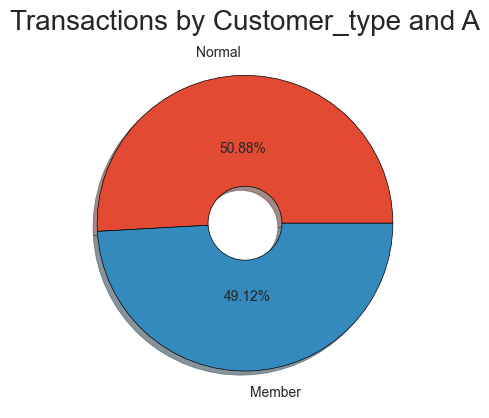

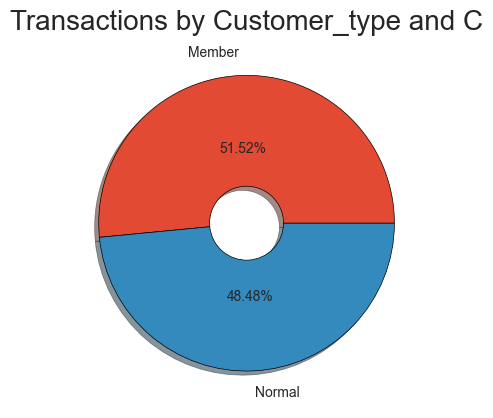

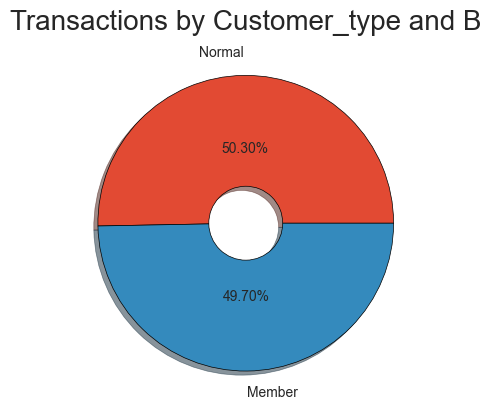

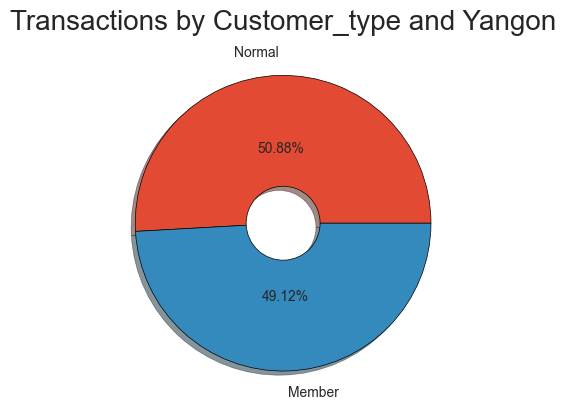

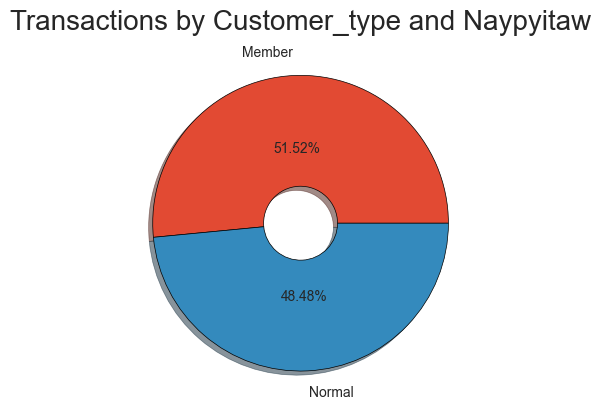

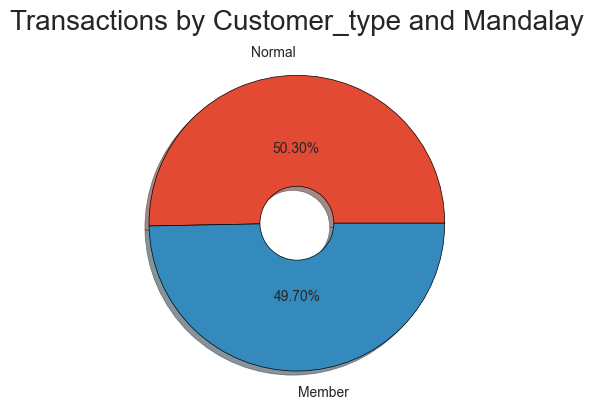

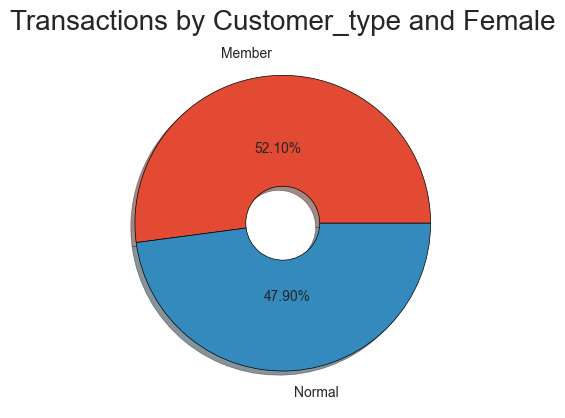

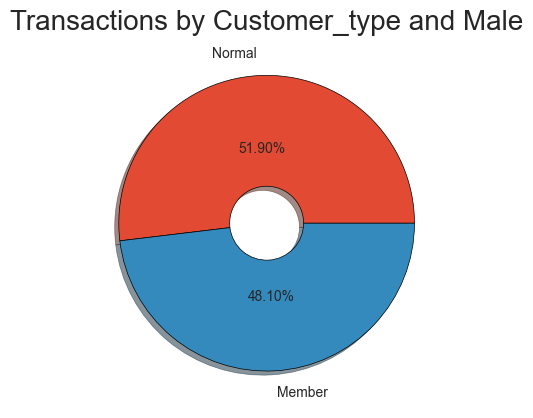

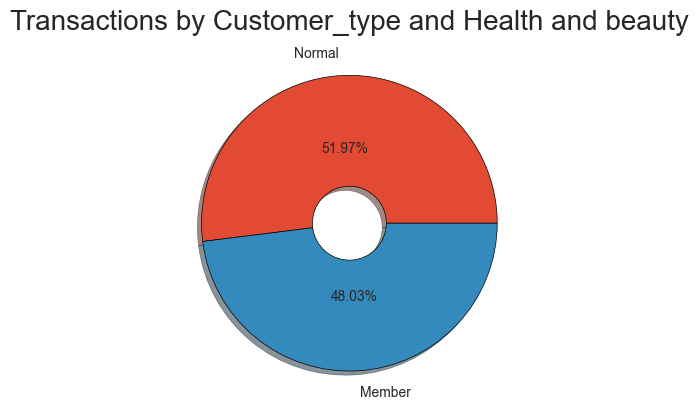

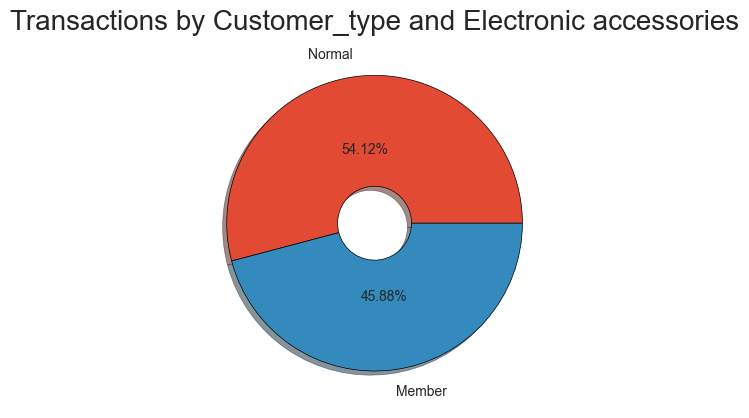

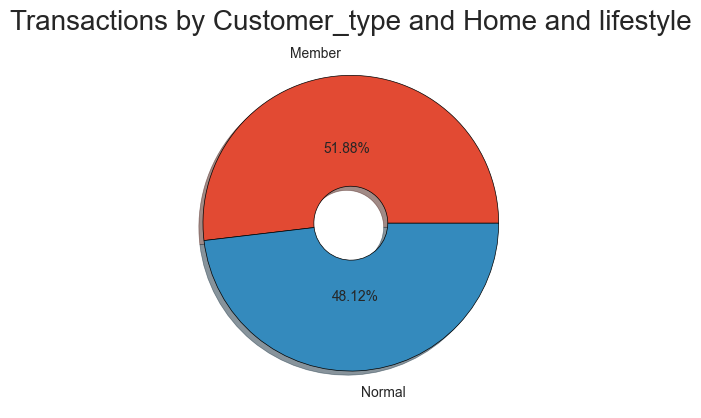

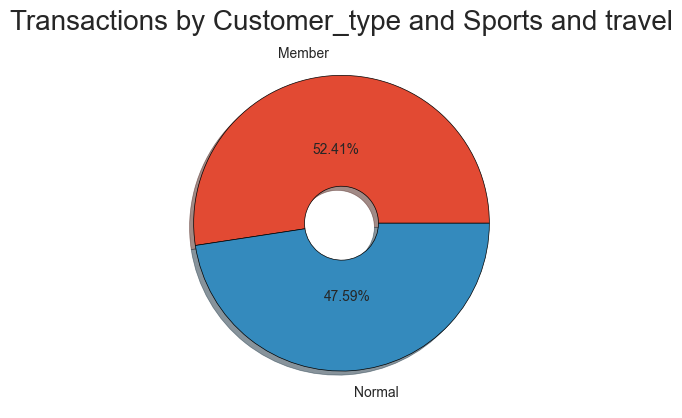

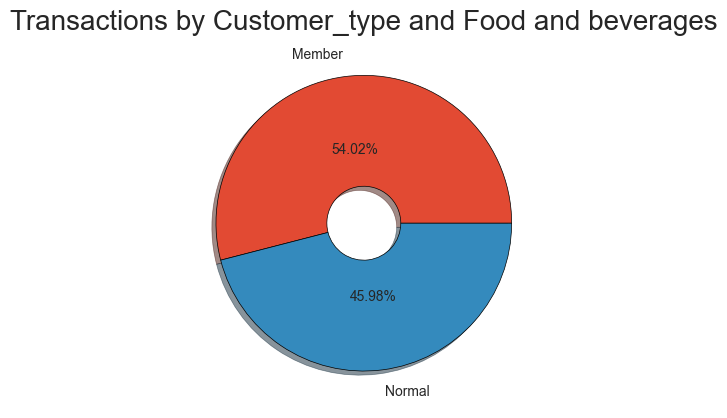

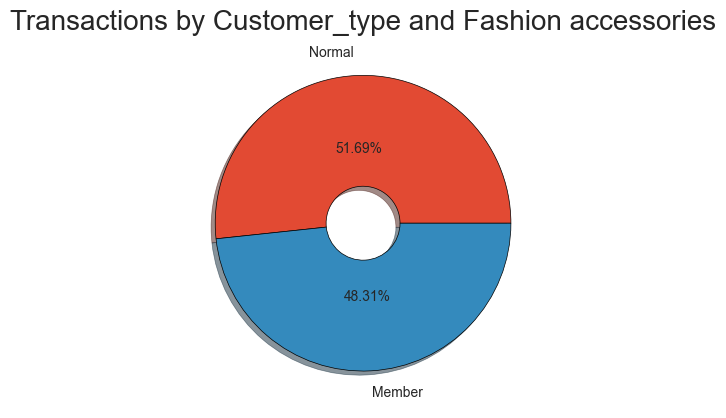

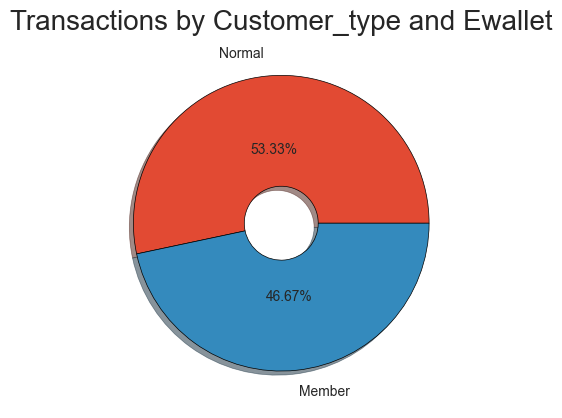

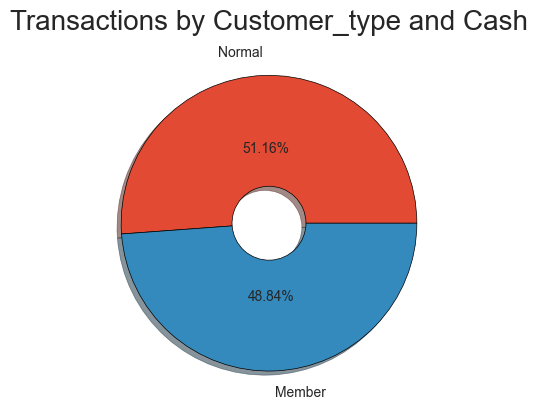

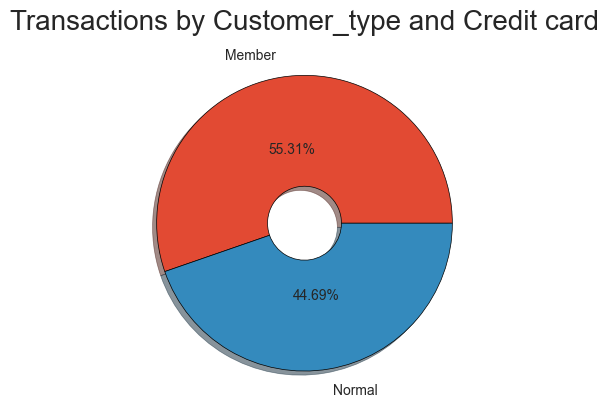

In [30]:
for i in ['Branch', 'City', 'Gender', 'Product line', 'Payment']:
    for j in sales[i].unique():
        salesByCustomerType = sales[sales[i] == j]['Customer_type'].value_counts()
        plt.pie(
            x=salesByCustomerType,
            labels=salesByCustomerType.keys(),
            labeldistance=1.15,
            autopct="%.2f%%",
            pctdistance=0.5,
            shadow=True,
            wedgeprops=dict(width=0.75, edgecolor='black')
        )
        plt.title(f"Transactions by Customer_type and {j}", fontsize=20)
        plt.show()

### **`Gender`**

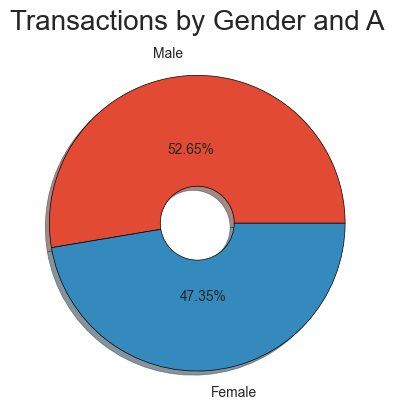

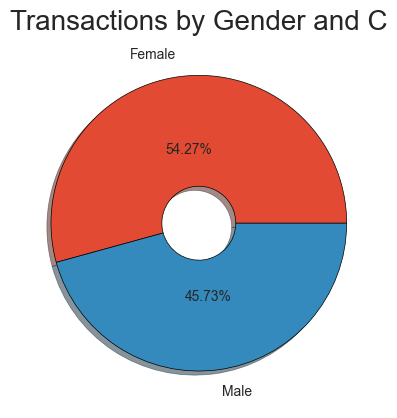

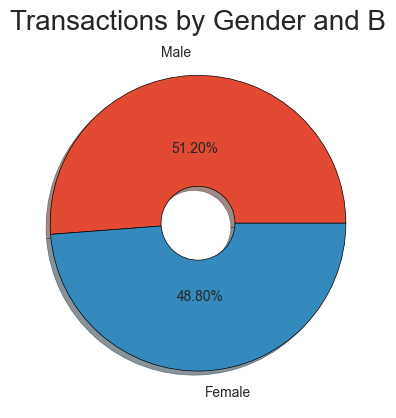

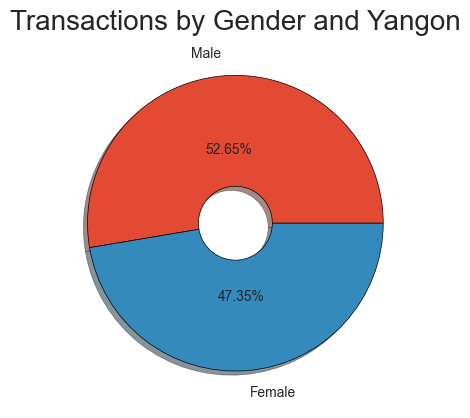

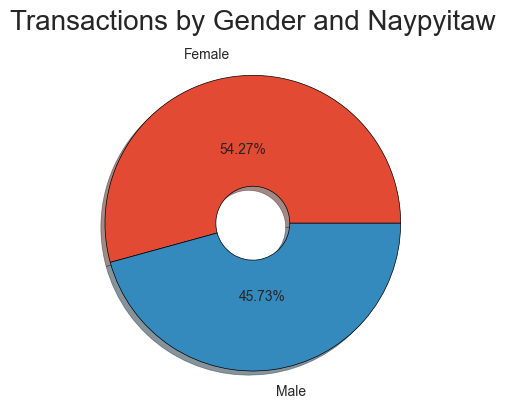

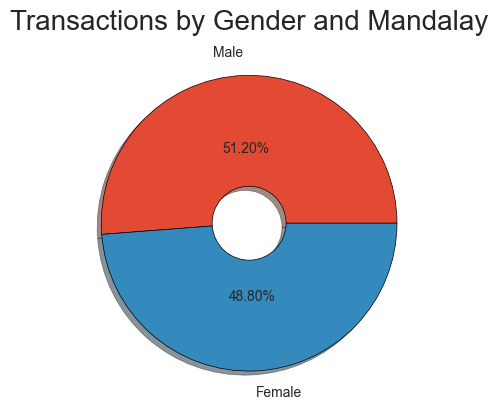

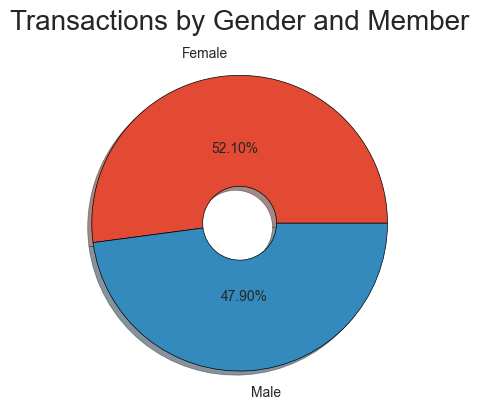

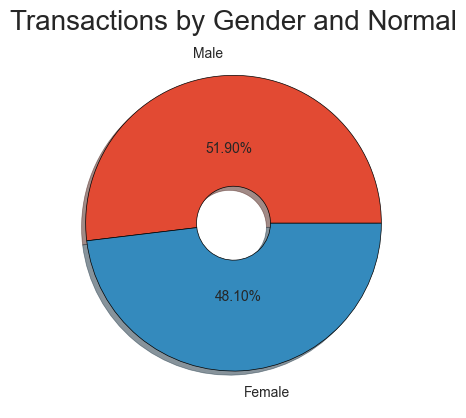

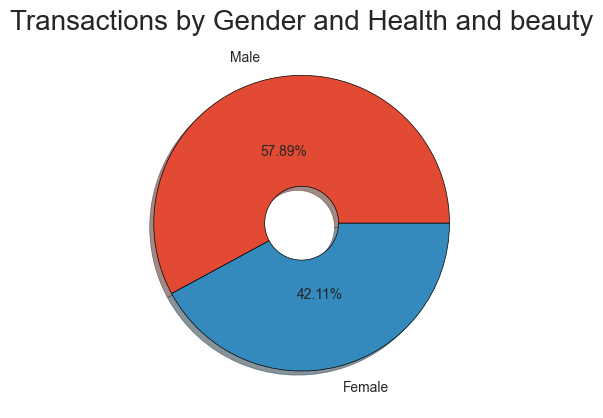

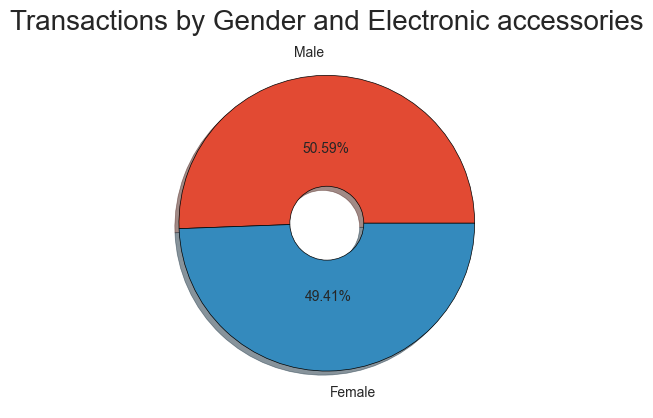

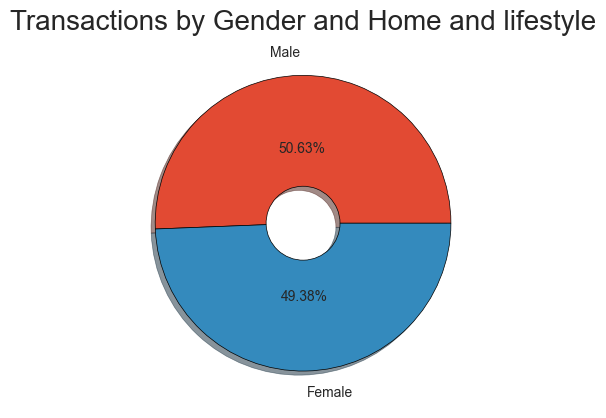

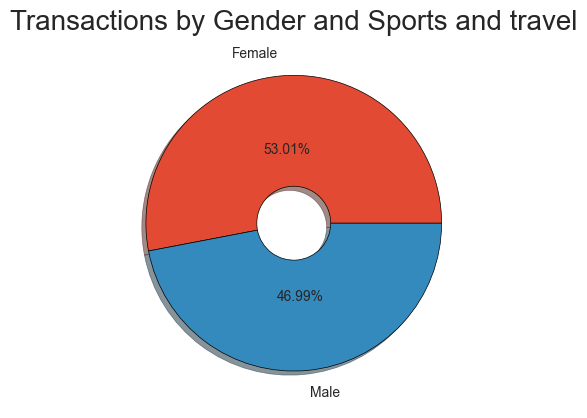

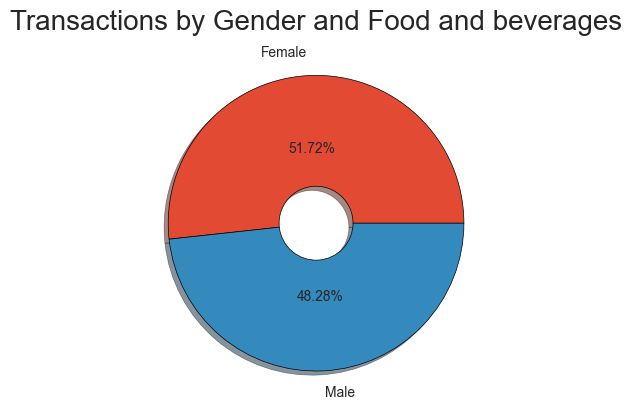

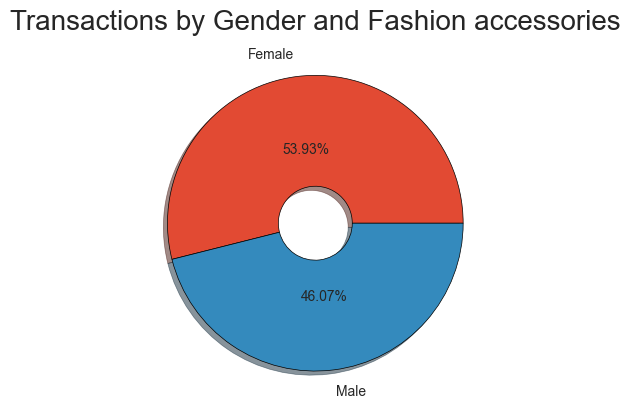

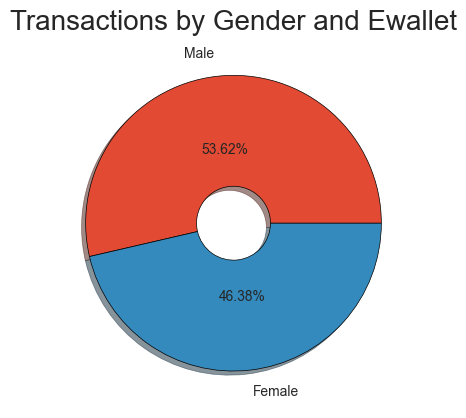

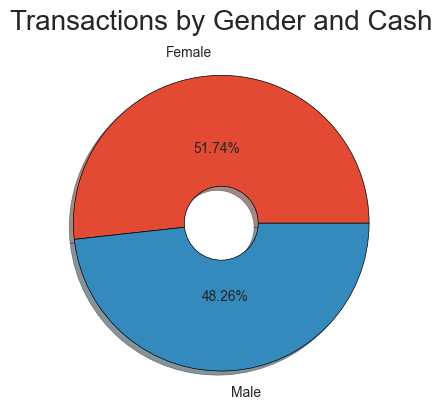

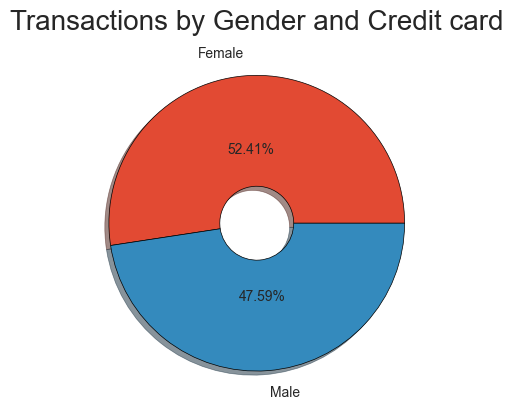

In [32]:
for i in ['Branch', 'City','Customer_type', 'Product line', 'Payment']:
    for j in sales[i].unique():
        salesByGender = sales[sales[i] == j]['Gender'].value_counts()
        plt.pie(
            x=salesByGender,
            labels=salesByGender.keys(),
            labeldistance=1.15,
            autopct="%.2f%%",
            pctdistance=0.5,
            shadow=True,
            wedgeprops=dict(width=0.75, edgecolor='black')
        )
        plt.title(f"Transactions by Gender and {j}", fontsize=20)
        plt.show()

### **`Product Line`**

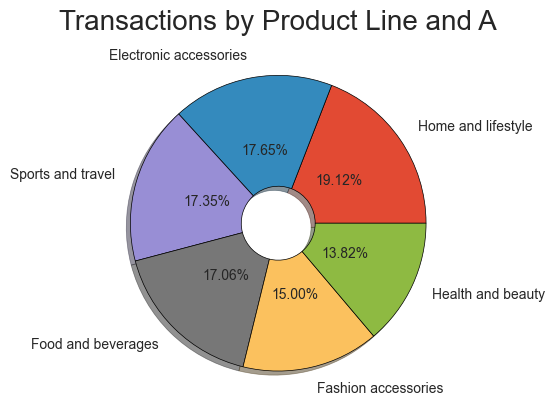

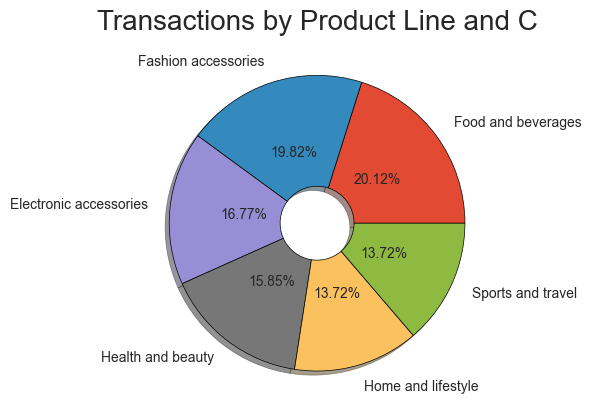

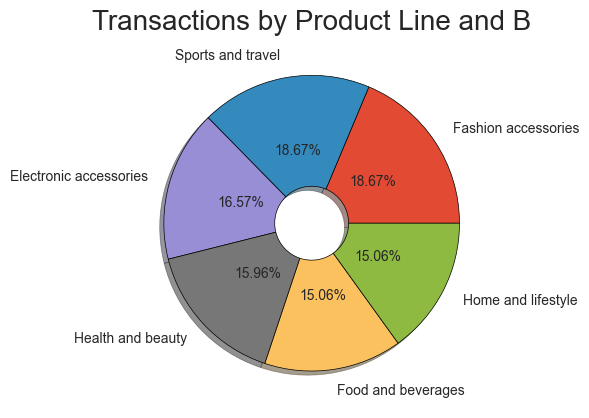

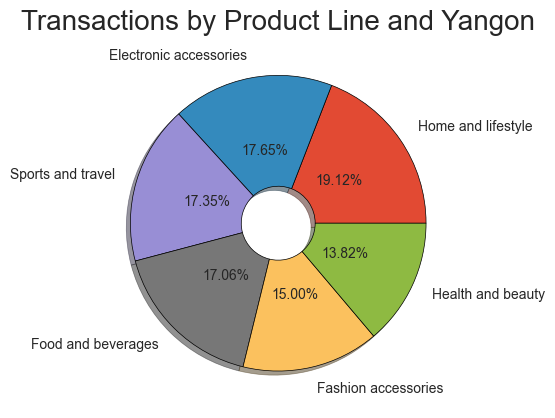

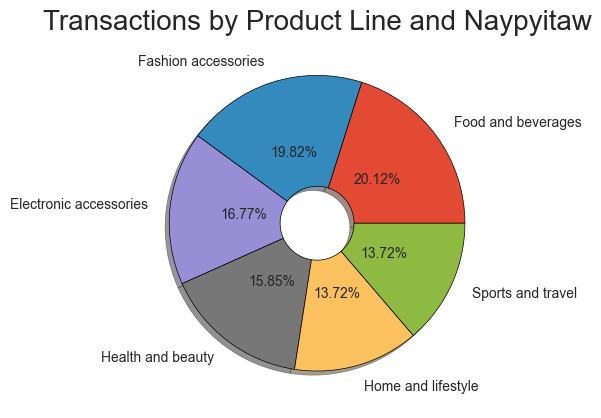

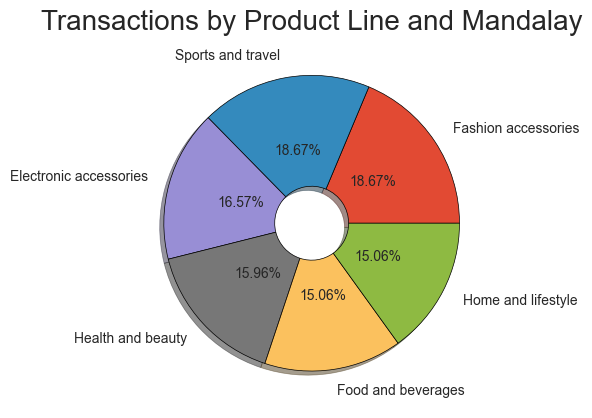

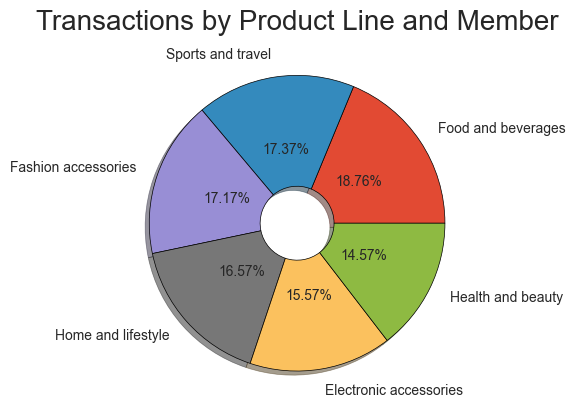

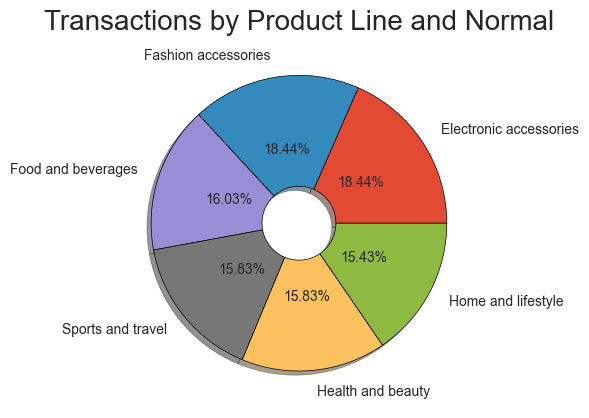

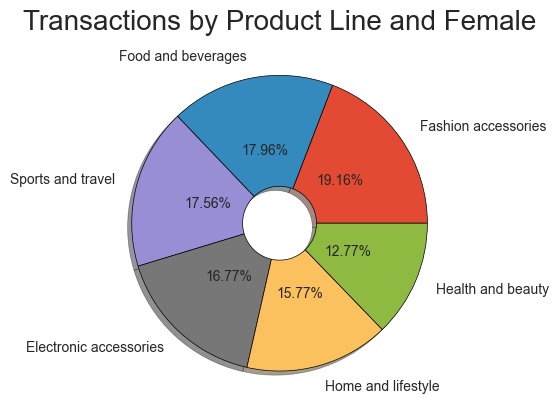

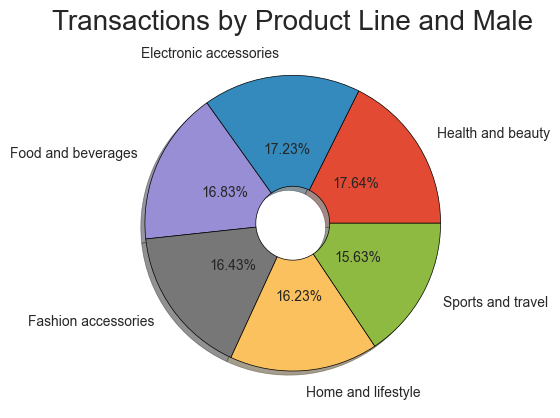

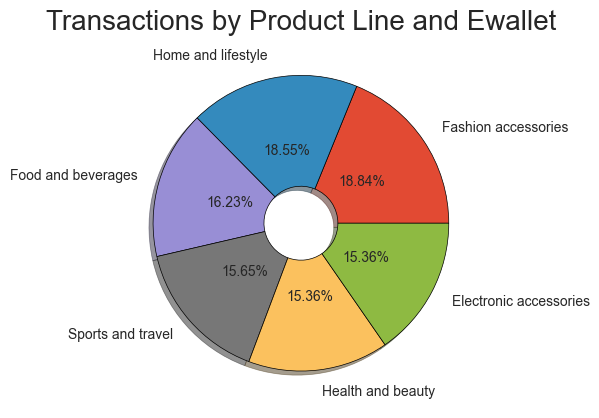

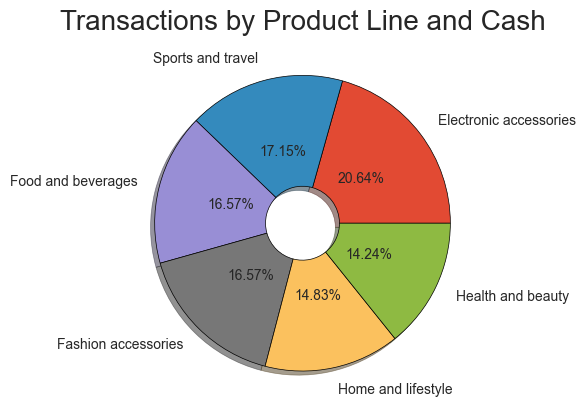

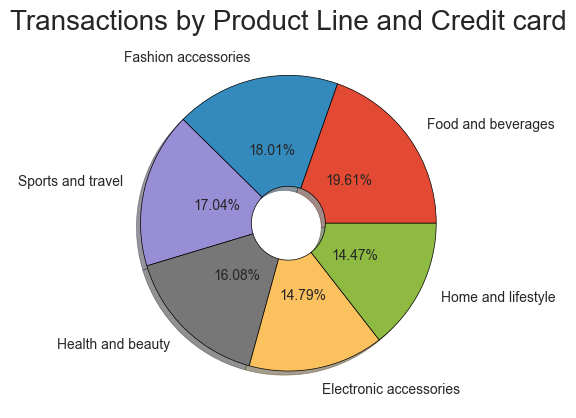

In [34]:
for i in ['Branch', 'City','Customer_type', 'Gender', 'Payment']:
    for j in sales[i].unique():
        salesByProductLine = sales[sales[i] == j]['Product line'].value_counts()
        plt.pie(
                x=salesByProductLine,
                labels=salesByProductLine.keys(),
                labeldistance=1.15,
                autopct="%.2f%%",
                pctdistance=0.5,
                shadow=True,
                wedgeprops=dict(width=0.75, edgecolor='black')
            )
        plt.title(f"Transactions by Product Line and {j}", fontsize=20)
        plt.show()

In [55]:
def PrintPieCharts(df : pd.DataFrame, col : str):
    catColumns = ['Branch', 'City','Customer_type', 'Product line','Gender', 'Payment']
    catColumns.remove(col)
    for i in catColumns:
        if i == col:
            pass
        for j in df[i].unique():
            dfByProductLine = df[df[i] == j][col].value_counts()
            plt.pie(
                    x=dfByProductLine,
                    labels=dfByProductLine.keys(),
                    labeldistance=1.15,
                    autopct="%.2f%%",
                    pctdistance=0.5,
                    shadow=True,
                    wedgeprops=dict(width=0.75, edgecolor='black')
                )
            plt.title(f"Transactions by {col} and {j} {i}", fontsize=20)
            plt.show()

### **`Payment`**

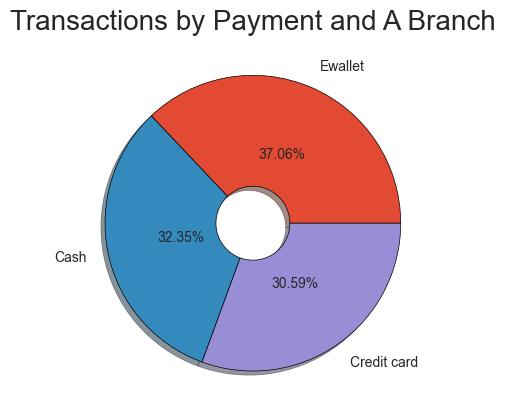

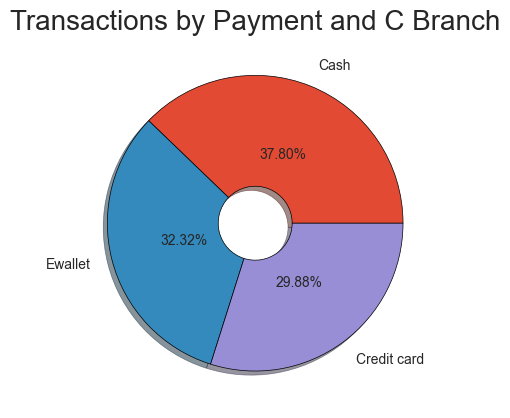

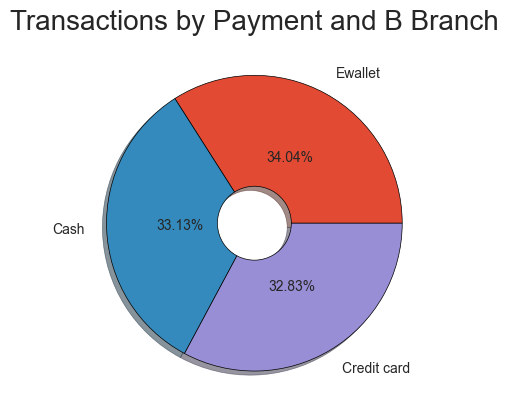

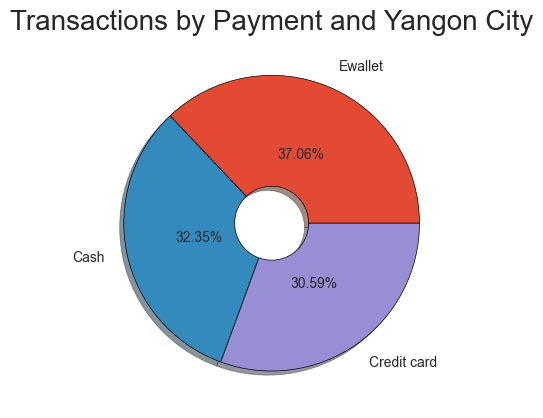

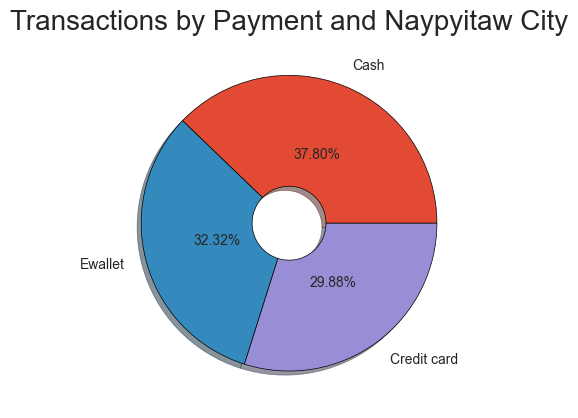

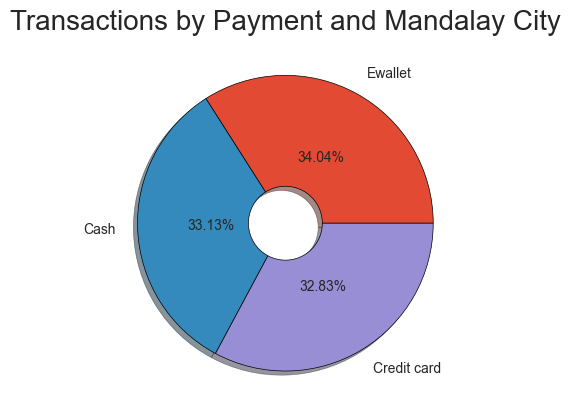

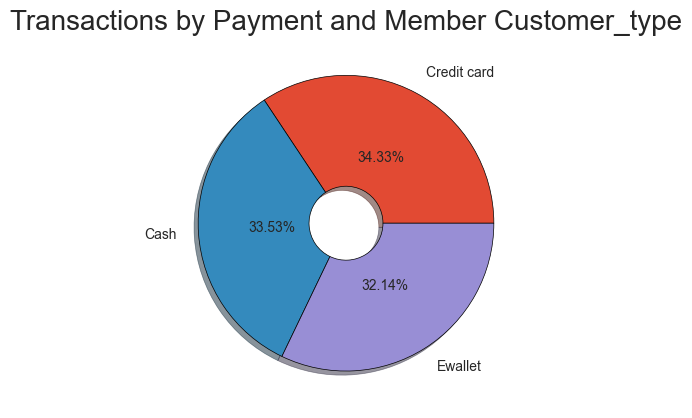

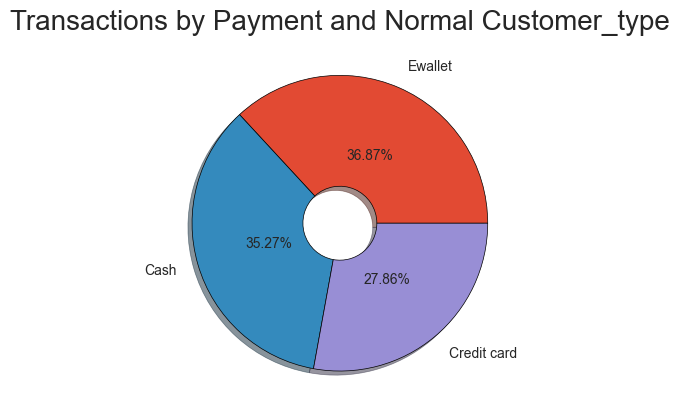

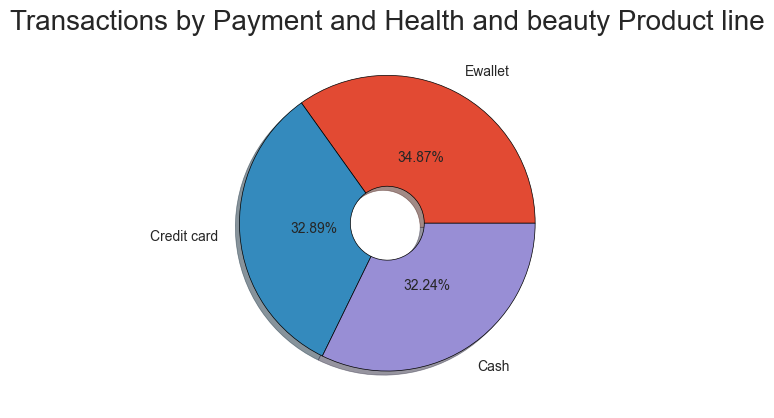

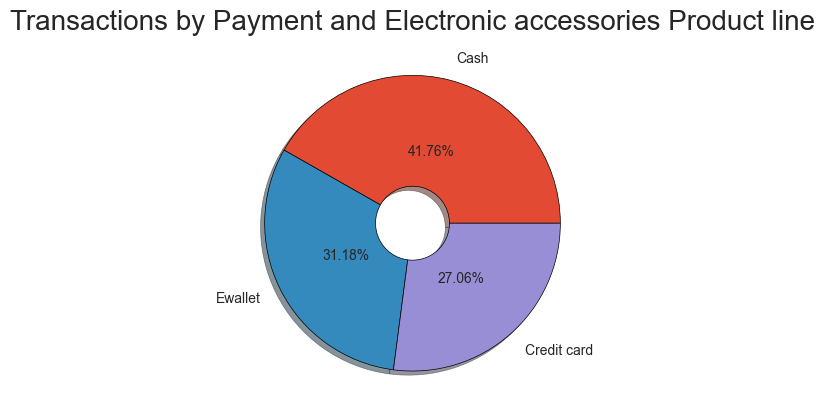

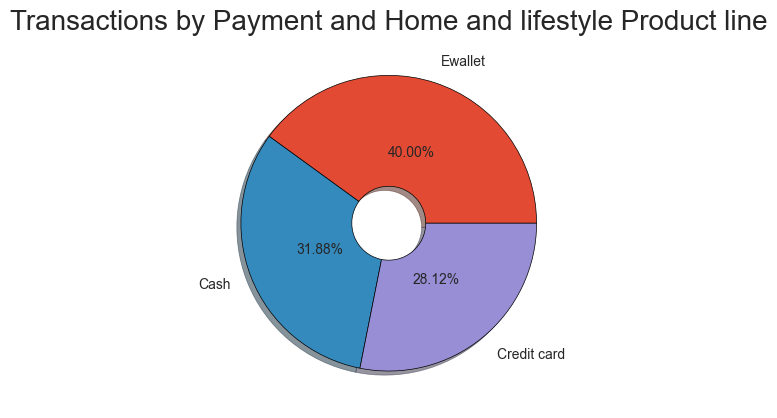

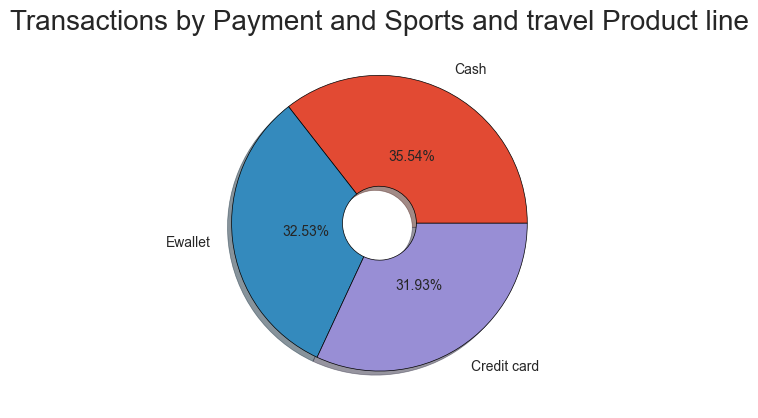

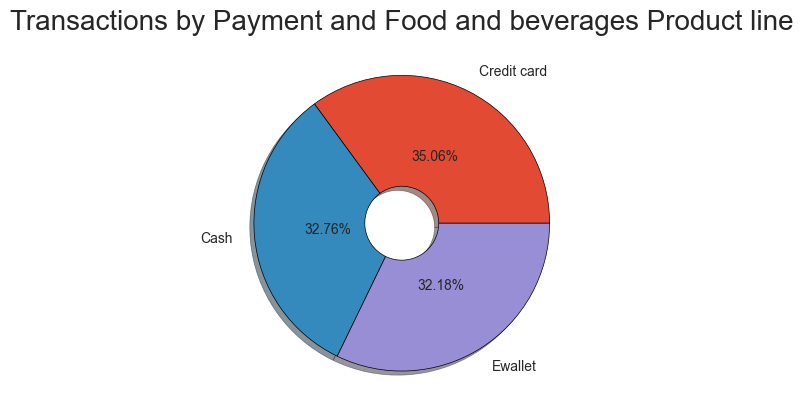

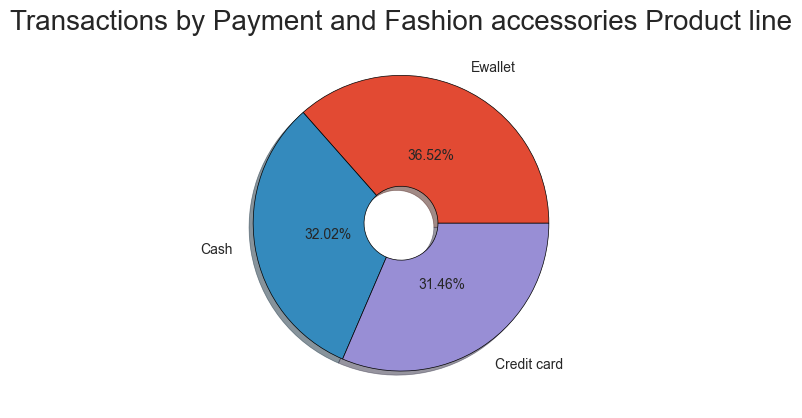

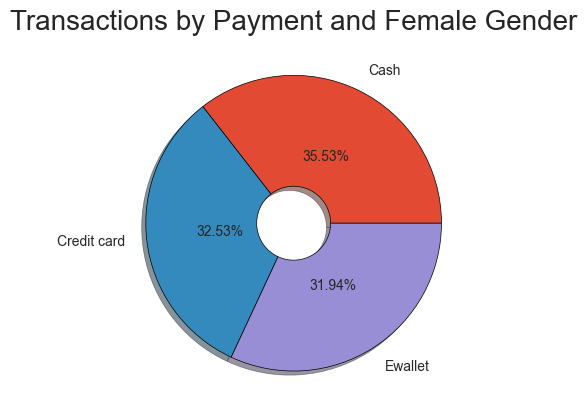

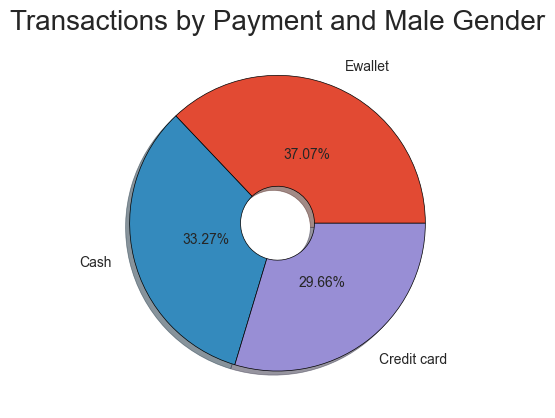

In [56]:
PrintPieCharts(sales, 'Payment')

### **`Quantity`**

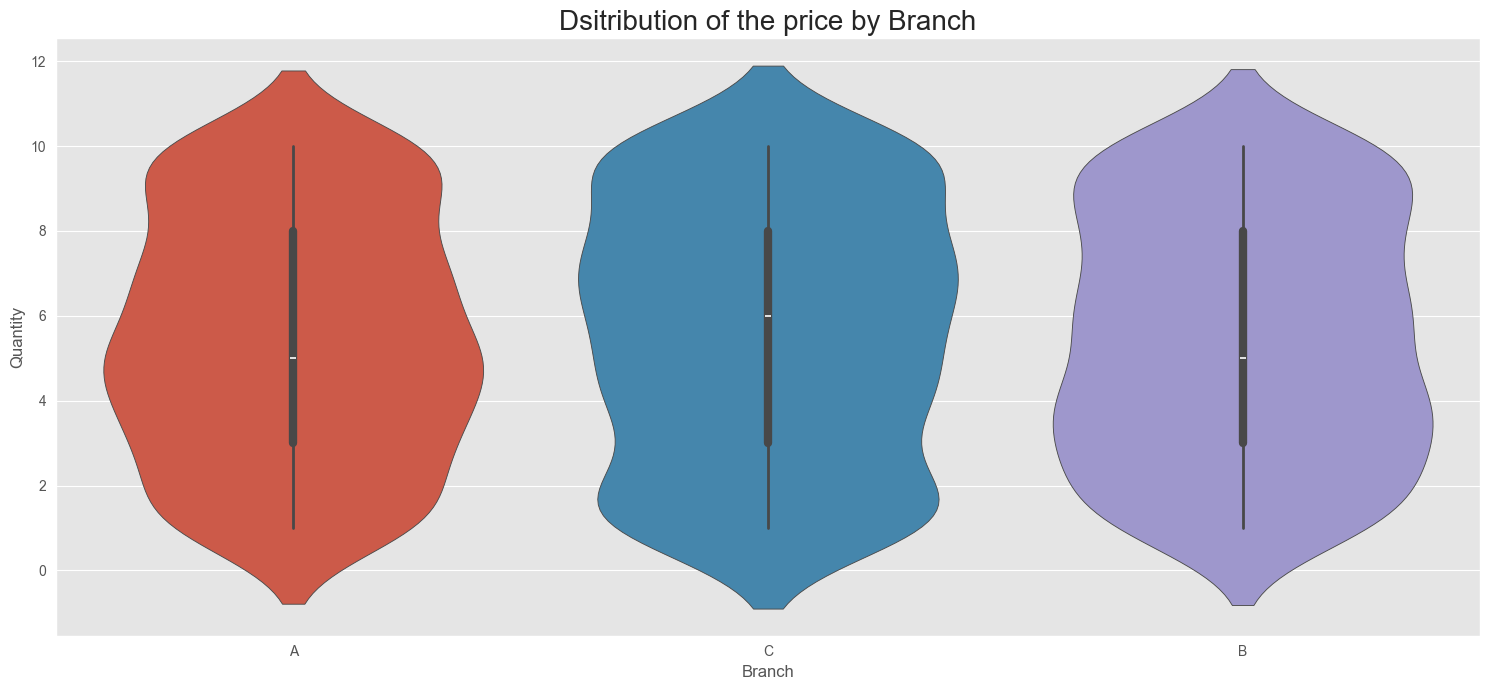

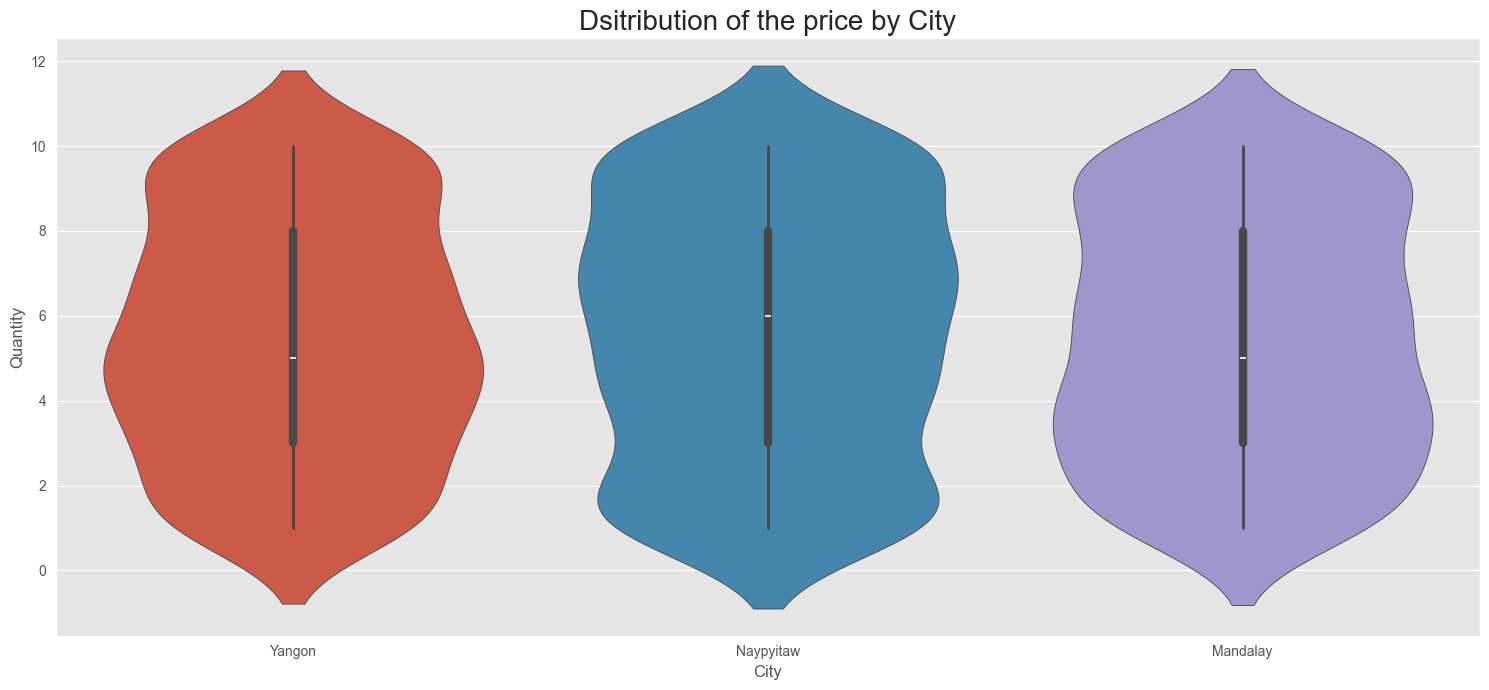

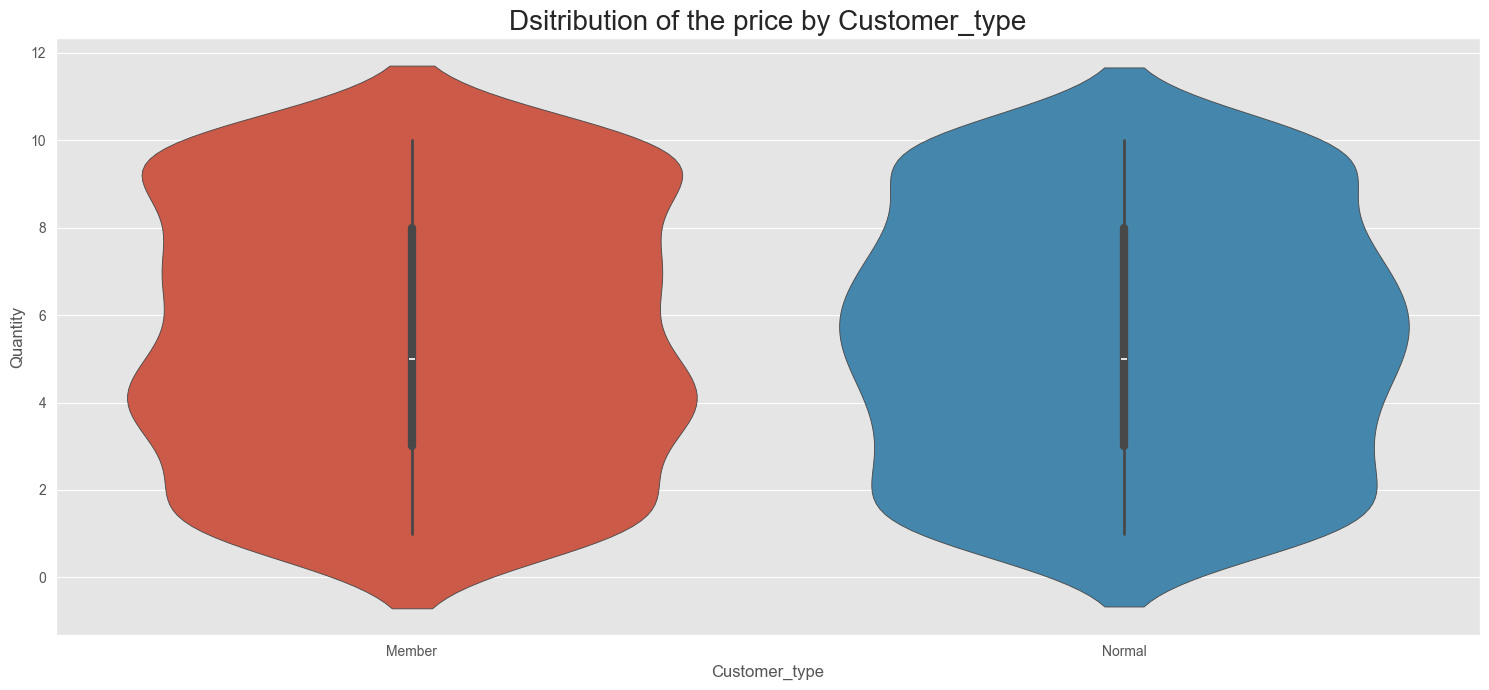

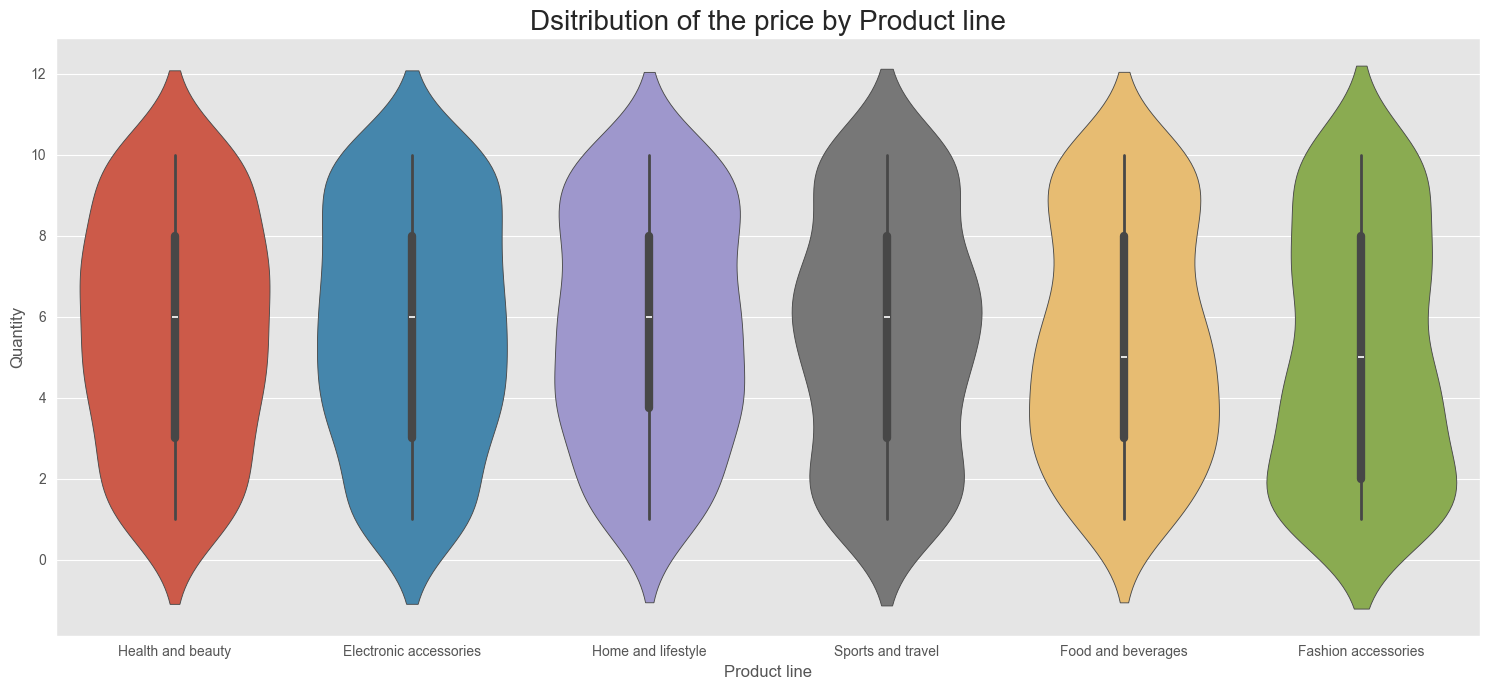

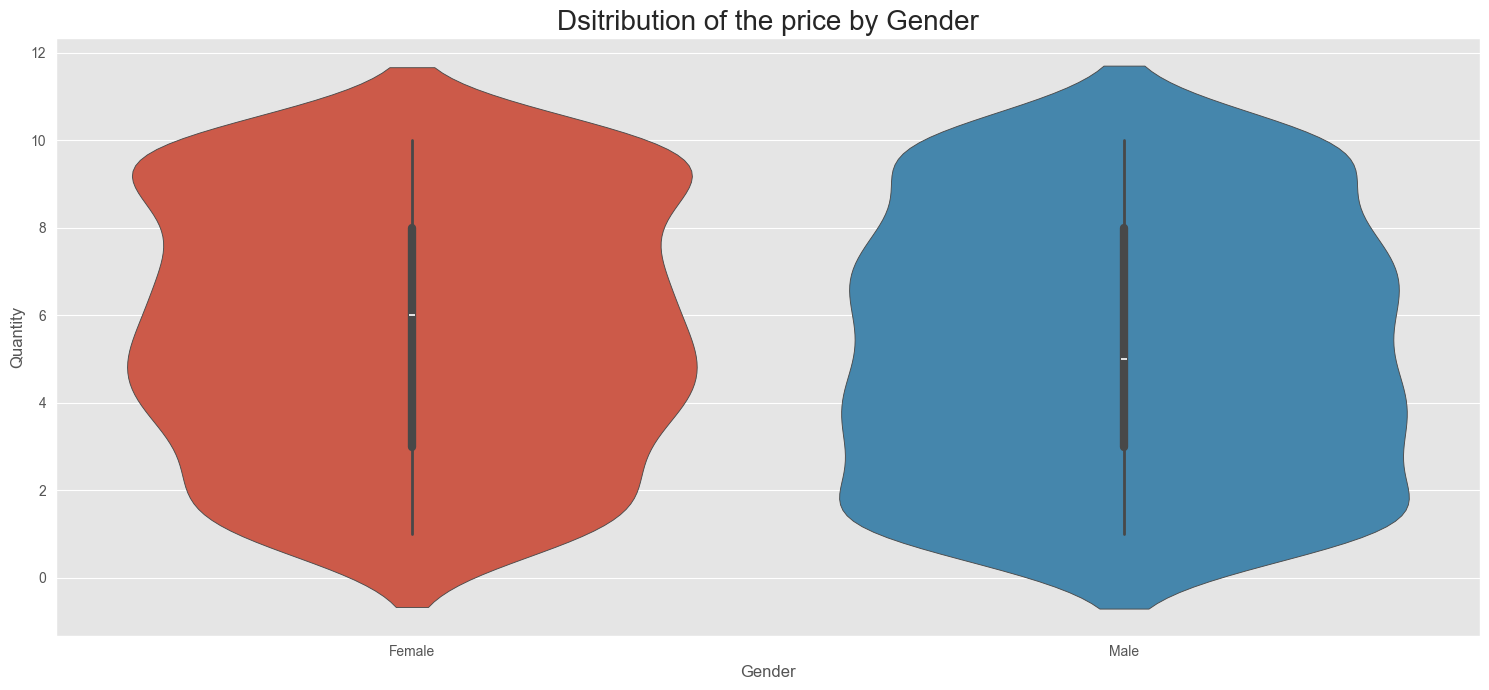

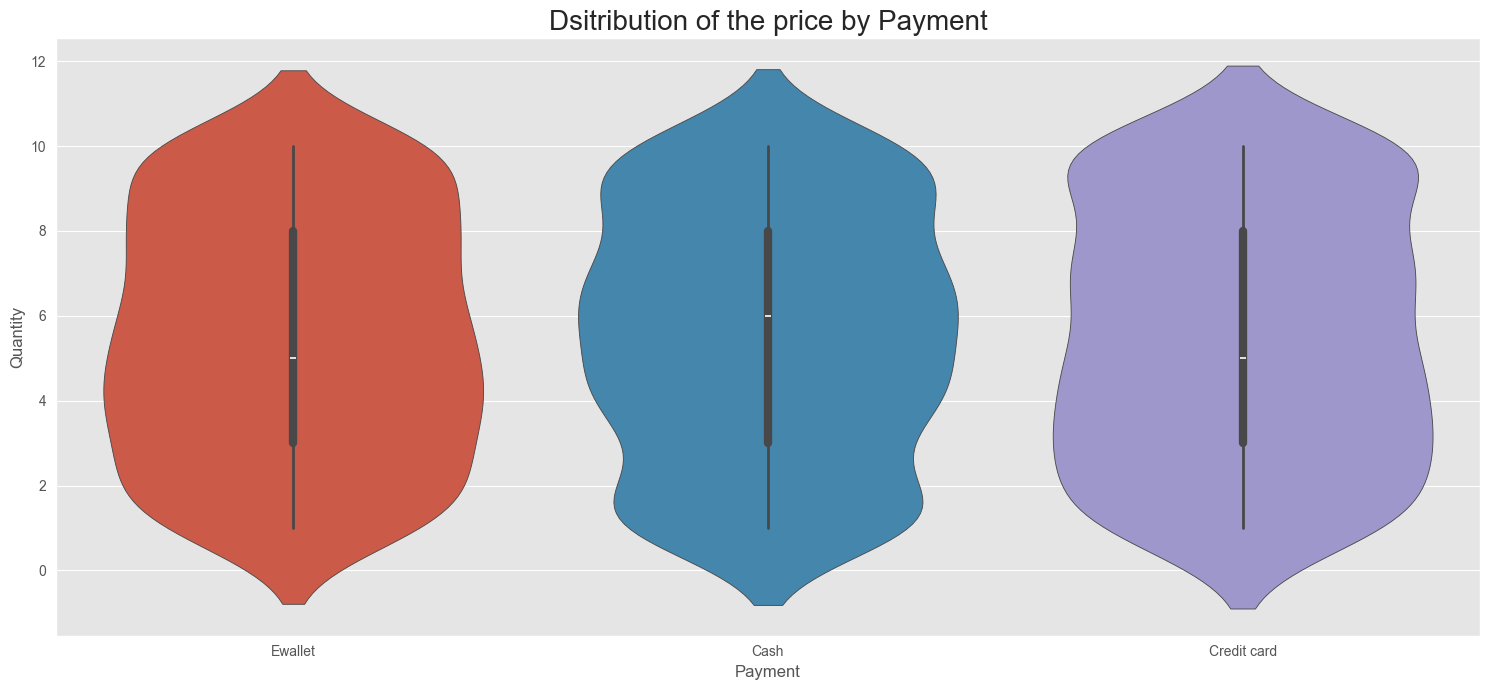

In [116]:
for i in ['Branch', 'City','Customer_type', 'Product line','Gender', 'Payment']:
    plt.figure(figsize=(15, 7))

    sns.violinplot(
        data=sales[[i,'Quantity',]],
        y='Quantity',
        x=i,
        hue=i,
        inner_kws=dict(box_width=6)
        )
    plt.title(f"Dsitribution of the price by {i}", fontsize=20)
    plt.tight_layout()
    plt.show()

### **`Date`**

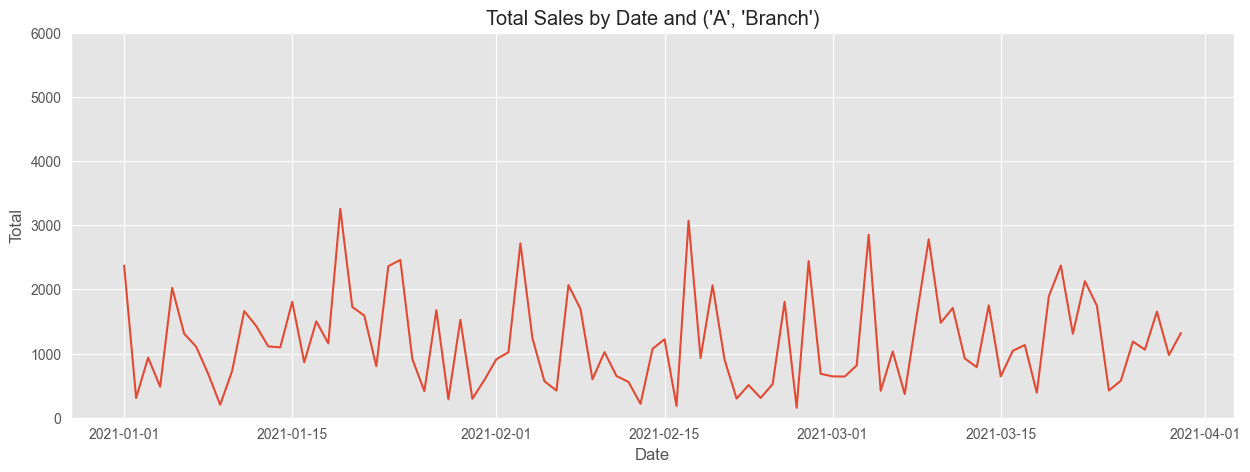

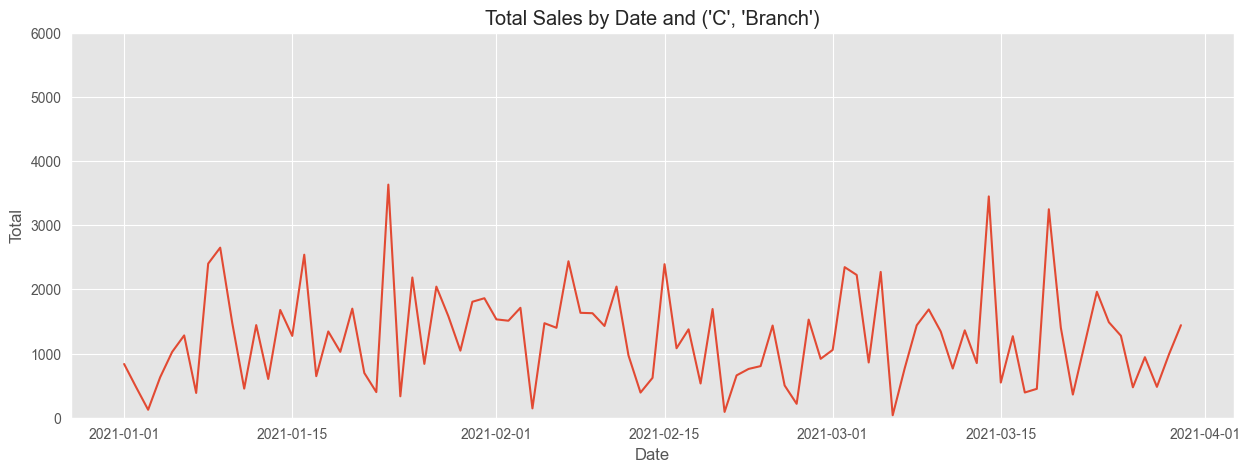

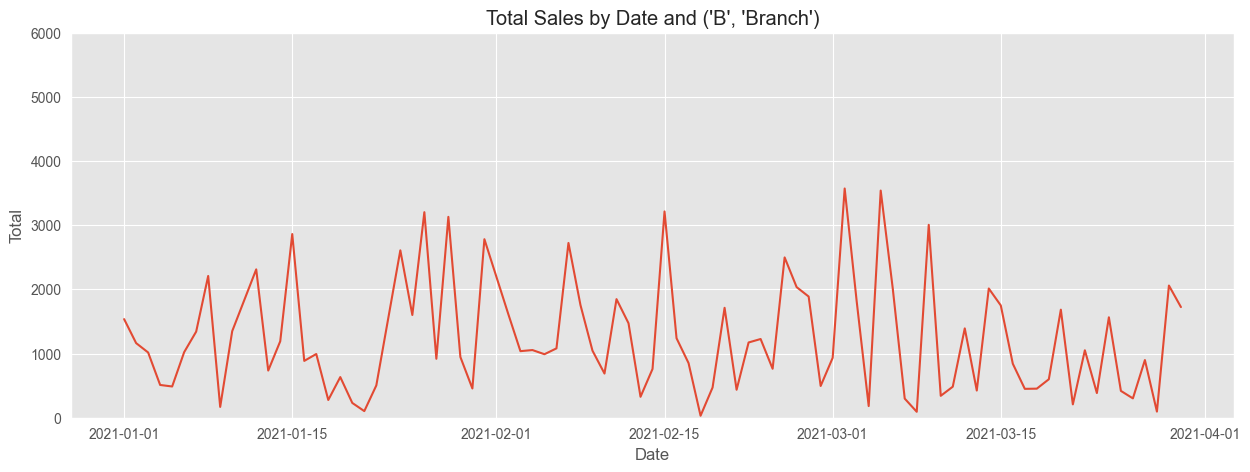

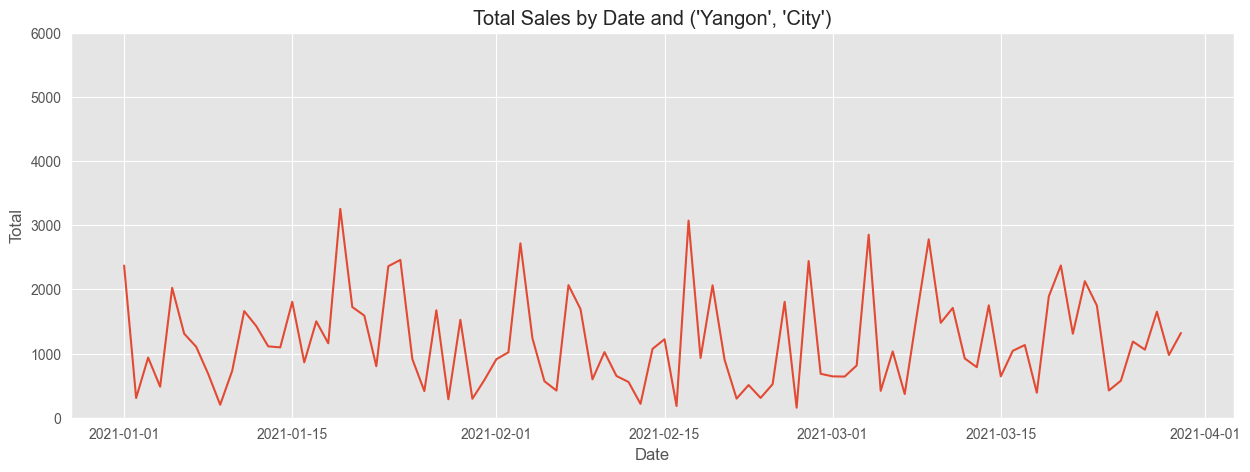

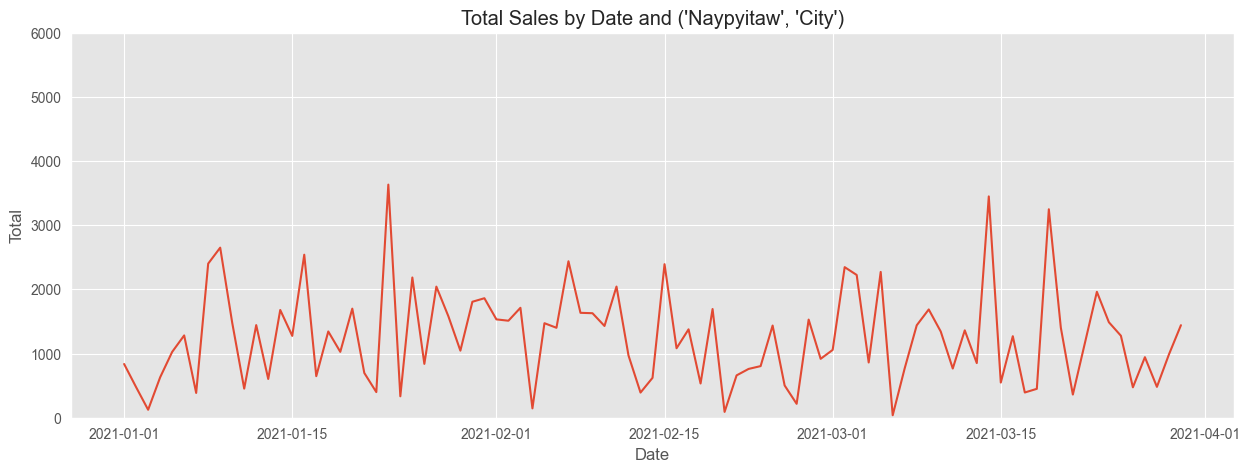

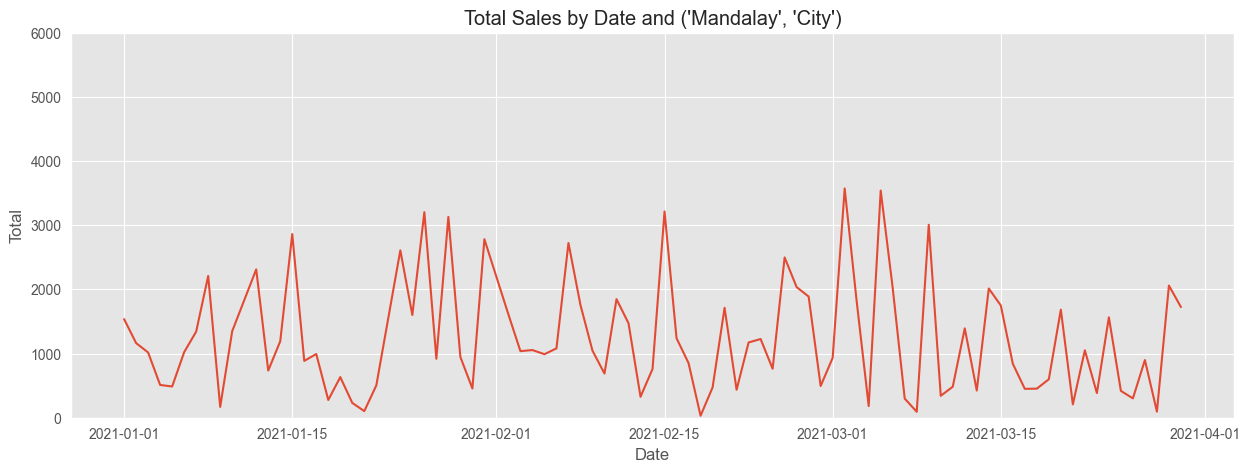

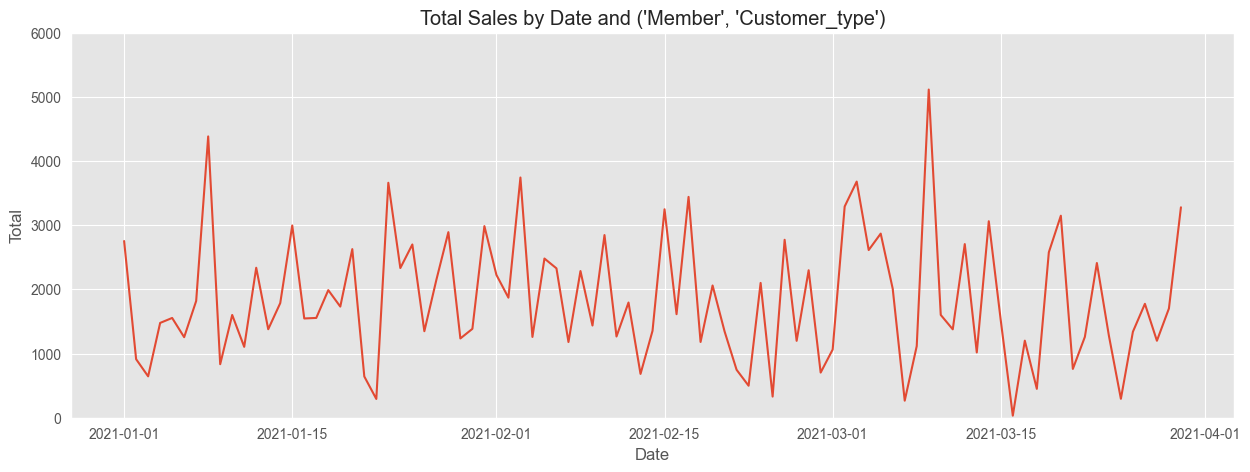

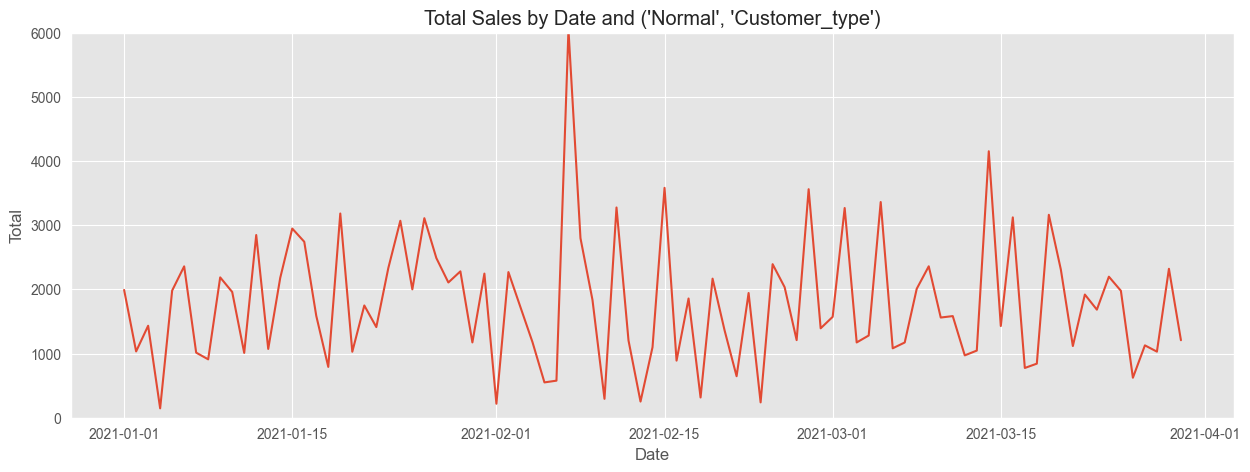

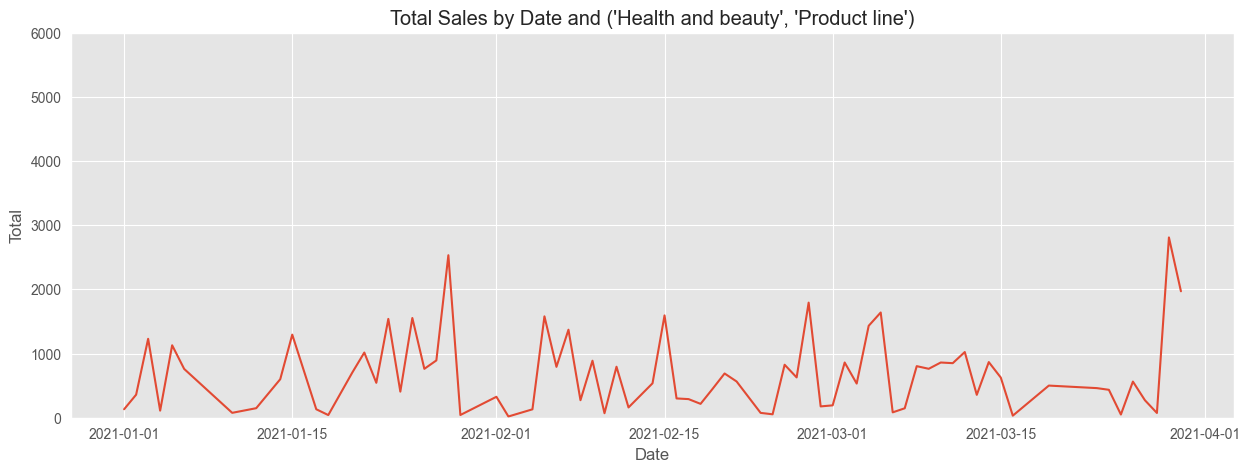

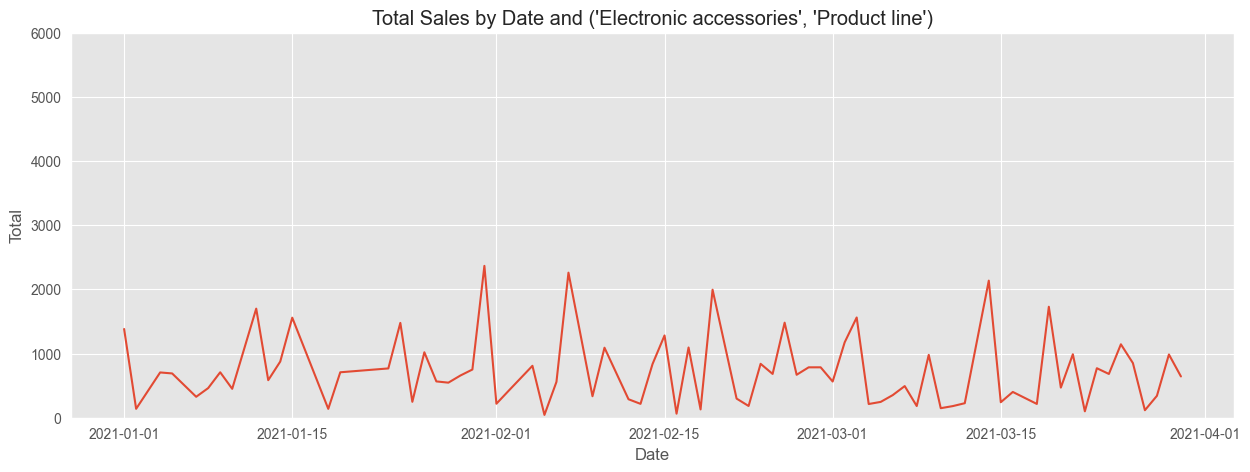

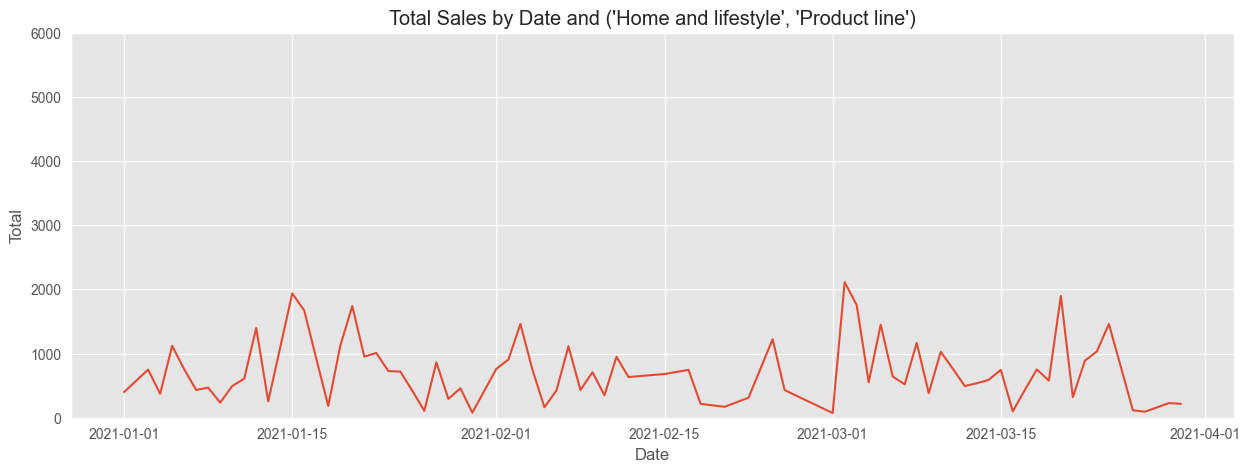

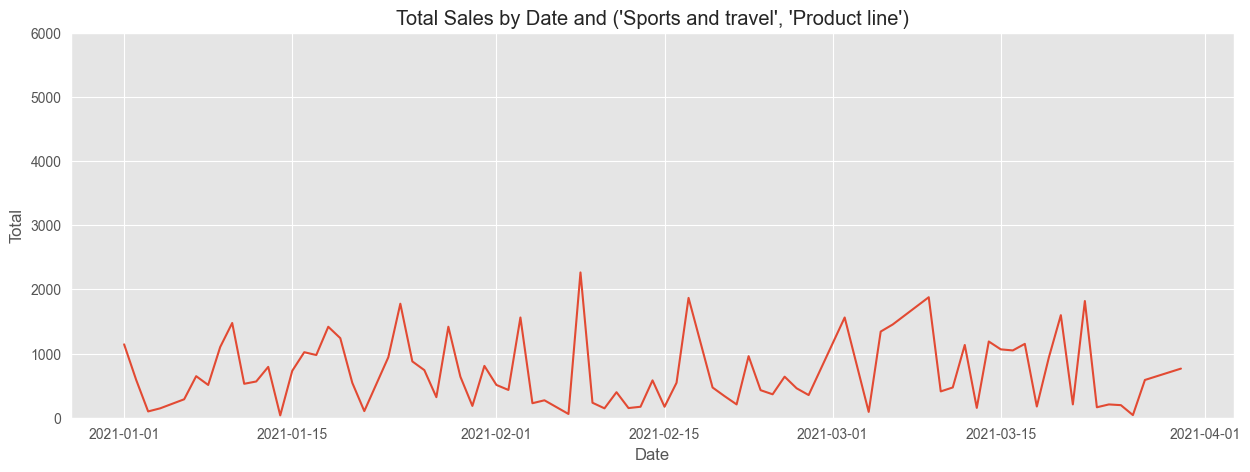

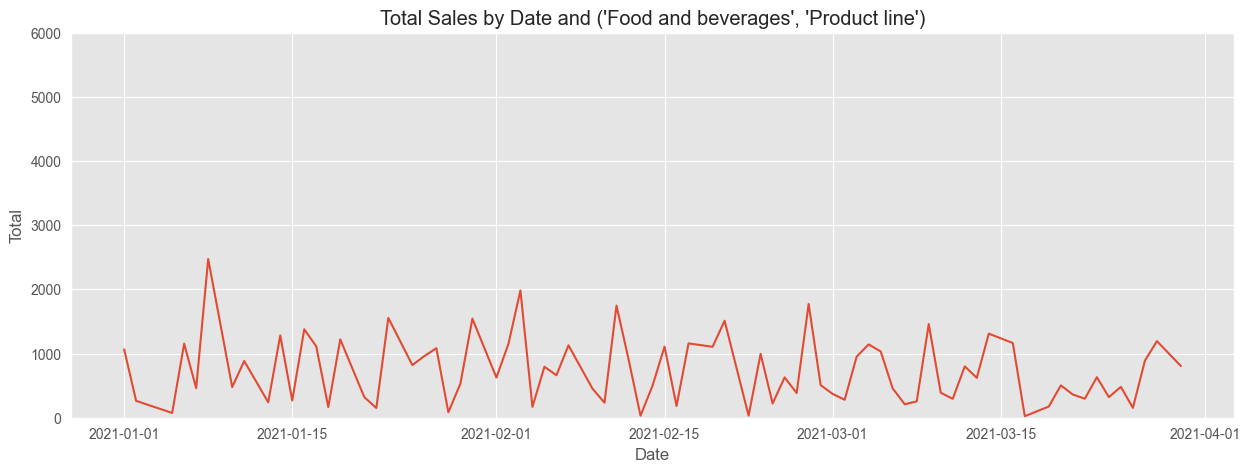

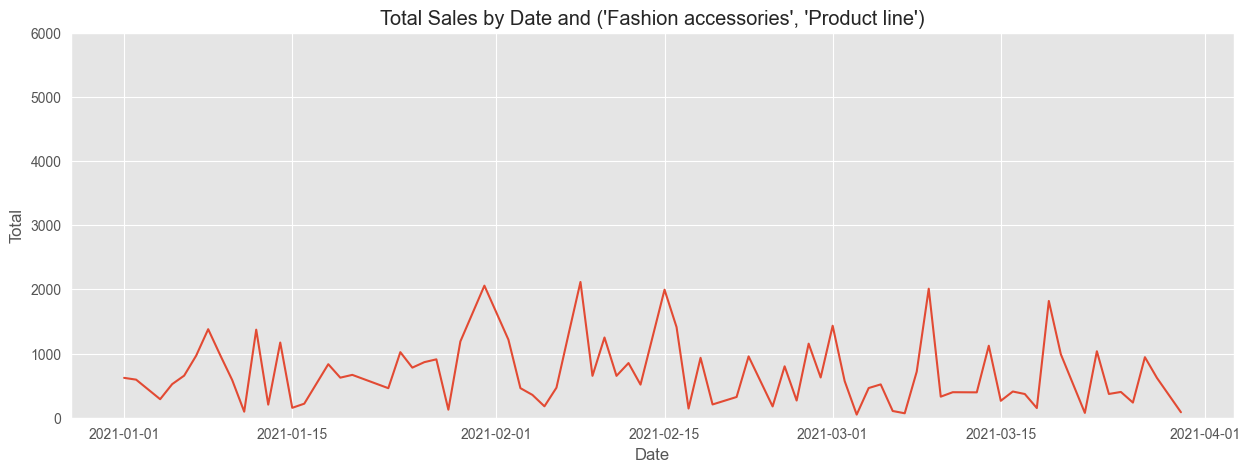

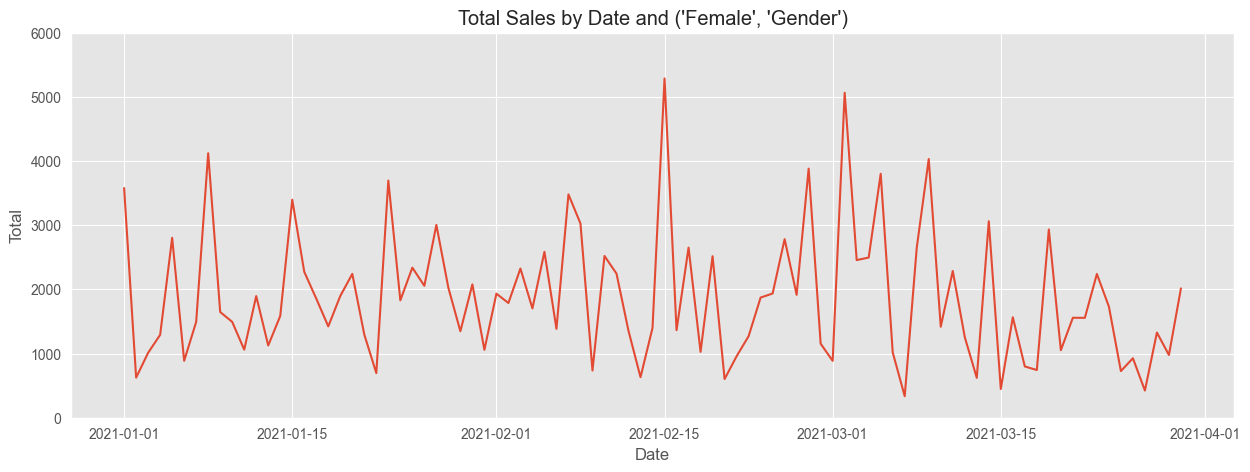

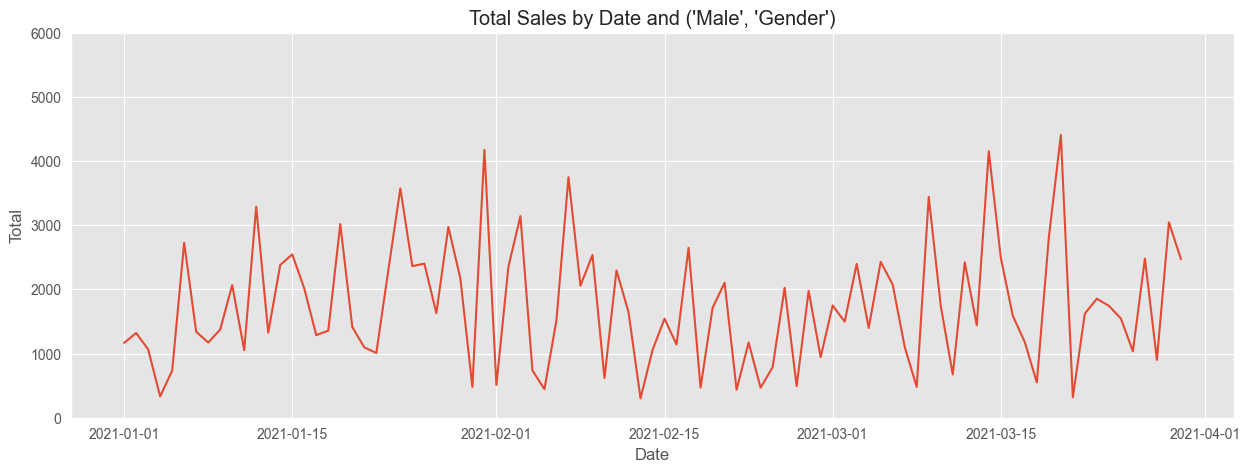

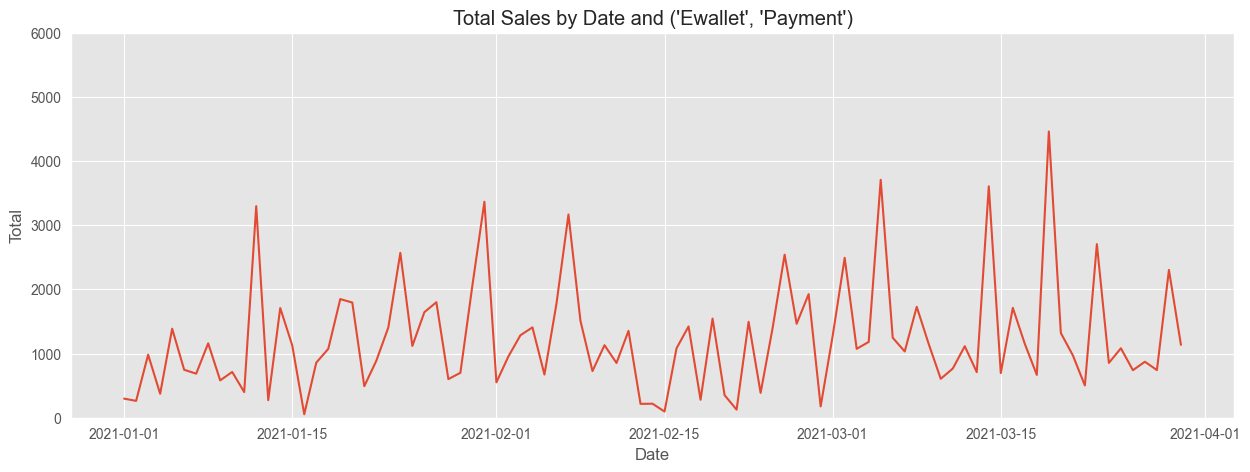

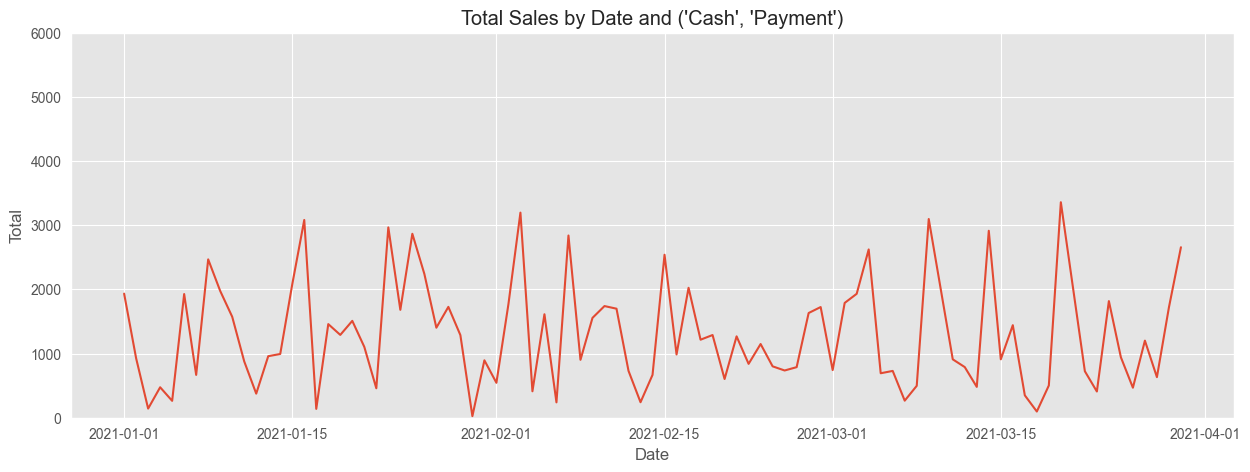

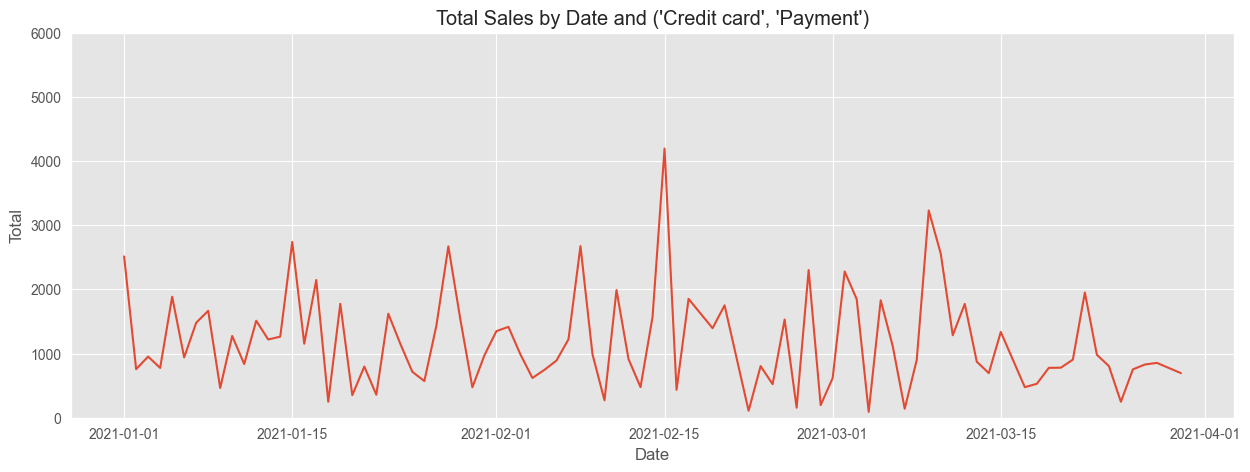

In [119]:
for i in ['Branch', 'City','Customer_type', 'Product line','Gender', 'Payment']:
    for j in sales[i].unique():
        totalSalesbyDate = sales[sales[i] == j].groupby('Date')['Total'].sum()
        plt.figure(figsize=(15,5))
        sns.lineplot(
            data=totalSalesbyDate
        )
        plt.ylim(0, 6000)
        plt.title(f"Total Sales by Date and {j, i}")